# <center> Кластеризация изображений транспортных средств

## Постановка задачи

<center> <img src=https://i.ibb.co/t8DvkyB/smart-city-image-1.jpg align="right" width="300"/> </center>
<center> <img src=https://i.ibb.co/qYkWNVh/smart-city-image-3.jpg align="right" width="300"/> </center>


Один из ключевых проектов IntelliVision — Smart City/Transportation, система, обеспечивающая безопасность дорожного движения и более эффективную работу парковок. С помощью Smart City/Transportation можно контролировать сигналы светофоров и соблюдение ограничений скорости, определять виды транспортных средств, распознавать номерные знаки, считать автомобили и людей.

В основе всех перечисленных возможностей проекта лежит CV (Computer Vision, компьютерное зрение). Чтобы их реализовать, компания использует модели, для обучения которых применяются огромные размеченные датасеты с изображениями транспортных средств. Однако система работает в режиме реального времени и с каждым днём данных становится всё больше. Алгоритм нуждается в постоянной модернизации и должен учитывать множество факторов.

Для модификации и повышения эффективности системы Smart City/Transportation команде необходимо автоматизировать определение дополнительных параметров авто на изображении:

* тип автомобиля (кузова),
* ракурс снимка (вид сзади/спереди),
* цвет автомобиля,
* другие характеристики.

Также необходимо автоматизировать поиск выбросов в данных (засветы и блики на изображениях, изображения, на которых отсутствуют автомобили и т. д.).

К сожалению, у компании нет комплексной модели, которая могла бы одновременно находить на изображении автомобиль и определять все нужные параметры. Её нужно построить, однако многокомпонентная разметка новых данных по всем этим параметрам — очень трудозатратное занятие, которое стоит больших денег.

При решении задачи разметки данных у команды возникла гипотеза, которая нуждается в исследовании.


**Гипотеза:** разметку исходных данных можно эффективно провести с помощью методов кластеризации. 


**В чём идея?**

*Давайте будем использовать небольшой набор моделей свёрточных нейронных сетей, обученных на различных датасетах и решающих различные задачи от классификации изображений по цвету до классификации типов транспортных средств, пропустим нашу базу изображений через каждую модель, но возьмём не выходной результат модели, а только промежуточное представление признаков (дескриптор), полученное на свёрточных слоях сети.*

*Выполним такую операцию для всех изображений из набора данных, на основе полученных дескрипторов кластеризуем изображения, проинтерпретируем полученные кластеры и попробуем найти в них необходимую информацию.*

Теперь, когда мы обсудили гипотезу, перейдём к постановке задачи.

<center> <img src=https://i.ibb.co/hLcBpZF/2023-03-27-12-11-17.png align="right" width="500"/> </center>

У вас будет набор из 416 314 изображений транспортных средств различных типов, цветов и снятых с разных ракурсов.

Команда IntelliVision уже обработала свой набор данных с помощью нескольких моделей глубокого обучения (свёрточных нейронных сетей) и получила четыре варианта вектора признаков (дескрипторов) для каждого изображения.

**Ваша задача** — используя готовые дескрипторы, разбить изображения на кластеры и проинтерпретировать каждый из них. Для всех вариантов дескрипторов нужно применить несколько алгоритмов кластеризации и сравнить полученные результаты. Сравнивать можно на основе метрик, визуализаций плотностей кластеров и по тому, насколько хорошо интерпретируются кластеры.

Дополнительная подзадача — найти выбросы среди изображений. Это могут быть изображения плохого качества, изображения с бликами или изображения, на которых нет транспортных средств и т. д.

Бизнес-задача: исследовать возможность применения алгоритмов кластеризации для разметки новых данных и поиска выбросов.

Техническая задача для вас как для специалиста в Data Science: построить модель кластеризации изображений на основе дескрипторов, выделяемых с помощью различных архитектур нейронных сетей, проинтерпретировать полученные результаты и выбрать модель или комбинацию моделей, которая выделяет наиболее пригодные для интерпретации признаки.

**Ваши основные цели:**
1. Для каждого типа дескрипторов необходимо:
    * выполнить предобработку дескрипторов;
    * произвести кластеризацию изображений на основе их дескрипторов, подобрав алгоритм и параметры кластеризации;
    * сделать визуализацию полученных кластеров в 2D- или 3D-пространстве;
    * проинтерпретировать полученные кластеры — в паре предложений сформулировать, какие изображения попали в каждый из кластеров.
2. Сравнить между собой полученные кластеризации для каждого типа дескрипторов (по метрикам, визуализации и результатам интерпретации).
3. Выполнить автоматизированный поиск выбросов среди изображений на основе дескрипторов.
4. Дополнительная задача (не оценивается): попробовать воспользоваться смесью дескрипторов, полученных различными моделями, и проинтерпретировать полученные результаты.

**Примечание.** При выборе алгоритма кластеризации следует ориентироваться на внутренние метрики, а именно на индекс Калински — Харабаса (`calinski_harabasz_score`) и индекс Дэвиса — Болдина (`davies_bouldin_score`), а также на интерпретируемость кластеров и визуализацию.

## Данные и их описание

Исходная папка с данными имеет следующую структуру:

```
IntelliVision_case
├─descriptors
    └─efficientnet-b7.pickle
    └─osnet.pickle
    └─vdc_color.pickle
    └─vdc_type.pickle
├─row_data
    └─veriwild.zip
├─images_paths.csv 
```

Давайте разберёмся в ней:

* В папке `descriptors` содержатся дескрипторы, полученные для каждого из изображений с помощью соответствующих нейронных сетей, в формате numpy-массивов, сохранённых в файлах pickle:
    * `efficientnet-b7.pickle` — дескрипторы, выделенные моделью классификации с архитектурой EfficientNet версии 7. Эта модель является свёрточной нейронной сетью, предобученной на на датасете ImageNet, в котором содержатся изображения более 1000 различных классов. Эта модель при обучении не видела датасета veriwiId. 

    * `osnet.pickle` — дескрипторы, выделенные моделью OSNet, обученной для детектирования людей, животных и машин. Модель не обучалась на исходном датасете veriwiId.

    * `vdc_color.pickle` — дескрипторы, выделенные моделью регрессии для определения цвета транспортных средств в формате RGB. Частично обучена на исходном датасете veriwild.
    
    * `vdc_type.pickle` — дескрипторы, выделенные моделью классификации транспортных средств по типу на десяти классах. Частично обучена на исходном датасете veriwild.

* В папке `row_data` содержится zip-архив с исходными изображениями автомобилей. Распакуйте его содержимое в папку row_data. Архив содержит десять папок с изображениями, пронумерованных от 1 до 10. Каждая папка содержит подпапки, обозначенные пятизначными цифрами, например 36191. 

В каждой из таких подпапок содержатся фотографии одного конкретного автомобиля с разных ракурсов, снятые с помощью дорожных видеокамер.

* В файле `images_paths.csv` представлен список из полных путей до изображений. Он пригодится вам при анализе изображений, попавших в определённый кластер.


Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np

# %matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

import pickle

import cupy as cp

from cuml import UMAP, TSNE
from cuml.decomposition import PCA
from cuml.preprocessing import StandardScaler, MinMaxScaler
from cuml.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN
from cuml.model_selection import GridSearchCV

from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

import time

# DataLoader, DataKeeper, conduct_grid_search, 
# display_models, countplot_clusters
from utils import *

## 1. Знакомство со структурой данных

Прочитайте numpy-массивы из предоставленных pickle-файлов.

**Примечание** Для удобства дальнейшей работы вы можете составить четыре DataFrame с путями до изображений и соответствующими им дескрипторами.

Посмотрите на размерности каждой из четырёх заданных матриц и сравните использованные модели глубокого обучения по размерностям выходных дескрипторов изображений. 


### Решение:

Организуем класс `DataLoader` для загрузки требуемого датасета (чтобы не перегружать оперативную память или память видеокарты)

Затем поочерёдно откроем датасеты для получения информации о них.

In [2]:
loader = DataLoader()
# Load datasets to show info
for descriptor in loader.descriptor_names:
    loader.load_descriptor(descriptor, dtype='numpy')
    loader.print_descriptor_info()

Shape of "image paths": (416314, 1)


paths
0  veriwild\1\00001\000001.jpg
1  veriwild\1\00001\000002.jpg
2  veriwild\1\00001\000003.jpg
3  veriwild\1\00001\000004.jpg
4  veriwild\1\00001\000005.jpg

All dataset downloaded
Descriptor "efficientnet-b7":
	Shape: (416314, 2560)
All dataset downloaded
Descriptor "osnet":
	Shape: (416314, 512)
All dataset downloaded
Descriptor "vdc_color":
	Shape: (416314, 128)
All dataset downloaded
Descriptor "vdc_type":
	Shape: (416314, 512)


**ВЫВОД:**

Датасет с путями, а также все дескрипторы, содержат одинаковое количество строк: 416314.
Датасет с путями содержит одну колонку 'paths', содержащую относительный путь до картинок.

Для этих картинок имеются четыре дескриптора (дескриптор - векторизованный выход после сверточных слоёв).
Самый большой дескриптор имеет модель классификации с архитектурой **EfficientNet** версии 7.
Следом за ней (по размеру дескриптора) идут модель **OSNet** и модель классификации транспортных средств по типу **'vdc_type'**.
Меньше всего размер дескриптора, отвечающего за цвет транспортного средства **'vdc_color'**.


## 2. Преобразование, очистка и анализ данных

Признаки, найденные с помощью некоторых моделей, исчисляются тысячами, что довольно много, учитывая общее количество наблюдений.

Как вы понимаете, производить кластеризацию на таком большом количестве признаков, которые были сформированы исходными моделями глубокого обучения, довольно сложно и затратно по времени. К тому же, многие признаки, найденные моделями на изображениях, могут быть сильно скоррелированы между собой.

Понизьте размерность исходных дескрипторов с помощью соответствующих методов. Можно уменьшить размерность входных данных до 100 или 200 признаков — этого будет достаточно, чтобы произвести кластеризацию, однако рекомендуем вам самостоятельно подобрать необходимое количество компонент в новом пространстве признаков.

Также позаботьтесь о масштабе признаков, воспользовавшись стандартизацией и нормализацией. После кластеризации определите, какой вариант масштабирования более успешен для каждого варианта дескрипторов.


### Решение

Подберём необходимое количество компонент для каждого дескриптора по объясняемому разбросу (explained_variance_ratio_) в предположении, что требуется минимум от 50 до 75 % объяснения данных.

Брать максимум мы не будем ввиду ограничений памяти в GPU.

In [3]:
for name in loader.descriptor_names:
    # Load only a half of the data
    loader.load_descriptor(
        name, 
        random_state=42,
        data_fraction=0.5
    )
    descriptor_name, descriptor = loader.descriptor

    print(f'ДЕСКРИПТОР "{descriptor_name}"')

    for n_components in np.arange(50, 400, 50):
        if n_components > descriptor.shape[1]:
            print('Достигнут предел по количеству признаков')
            break
        pca_cu = PCA(n_components=n_components, random_state=42)
        effnt_cu = pca_cu.fit_transform(descriptor)
        print('Количество признаков:', n_components, 
            '\t"Объясняемый" разброс:', 
            f'{pca_cu.explained_variance_ratio_.sum():.3f}'
        )
    print()

ДЕСКРИПТОР "efficientnet-b7"
Количество признаков: 50 	"Объясняемый" разброс: 0.343
Количество признаков: 100 	"Объясняемый" разброс: 0.466
Количество признаков: 150 	"Объясняемый" разброс: 0.557
Количество признаков: 200 	"Объясняемый" разброс: 0.628
Количество признаков: 250 	"Объясняемый" разброс: 0.685
Количество признаков: 300 	"Объясняемый" разброс: 0.730
Количество признаков: 350 	"Объясняемый" разброс: 0.762

ДЕСКРИПТОР "osnet"
Количество признаков: 50 	"Объясняемый" разброс: 0.846
Количество признаков: 100 	"Объясняемый" разброс: 0.925
Количество признаков: 150 	"Объясняемый" разброс: 0.955
Количество признаков: 200 	"Объясняемый" разброс: 0.970
Количество признаков: 250 	"Объясняемый" разброс: 0.980
Количество признаков: 300 	"Объясняемый" разброс: 0.987
Количество признаков: 350 	"Объясняемый" разброс: 0.992

ДЕСКРИПТОР "vdc_color"
Количество признаков: 50 	"Объясняемый" разброс: 0.870
Количество признаков: 100 	"Объясняемый" разброс: 0.963
Достигнут предел по количеству при

Возьмём:

- "efficientnet-b7": 250,

- "osnet": 150,

- "vdc_color": 100,

- "vdc_type": 150,

Создадим класс `DataKeeper` для хранения дескрипторов с уменьшенным количеством признаков (с помощью метода главных компонент), а также их масштабированных версий (StandardScaler и MinMacScaler)

Примем следующие значения количества признаков в PCA из условия, что "объясняемый" разброс не увеличивается значительно с последующим увеличением (см. атрибут `n_components_dict` в классе `DataKeeper`).

Рассмотрим работу PCA, MinMaxScaler и StandardScaler на примере "первого" в списке дескриптора:

In [4]:
if 'loader' in locals():
    del loader # Remove data loader to free GPU storage
cp._default_memory_pool.free_all_blocks()

# Load descriptor, conduct PCA and get scaled datasets
data_keeper = DataKeeper()
data_keeper.load_descriptor_PCA(
    name=data_keeper.loader.descriptor_names[0],
    data_fraction=0.5,
    random_state=42,
)
data_keeper.get_std_scaled_descriptor()
data_keeper.get_norm_scaled_descriptor()

print(f'Normalized descriptor: {data_keeper.descriptors_scaled["norm"].shape}')
print('Standartized descriptor:', 
      data_keeper.descriptors_scaled["std"].shape
)

Normalized descriptor: (208157, 250)
Standartized descriptor: (208157, 250)


В следующем разделе будет выбран наилучший метод масштабирования.

## 3. Моделирование и оценка качества модели

### 3.1. Кластеризация изображений

После предобработки исходных данных произведите кластеризацию для каждого набора дескрипторов.

Для решения задачи используйте несколько различных методов, подобрав оптимальное количество кластеров для каждого метода и варианта дескрипторов.

В качестве метрики для подбора оптимального количества кластеров используйте внутренние меры индекс Калински — Харабаса (`calinski_harabasz_score`) и индекс Дэвиса — Болдина (`davies_bouldin_score`).

Рекомендуем вынести код для построения моделей кластеризации и подбора их параметров в отдельную функцию, чтобы не множить одинаковый код для четырёх случаев дескрипторов.

**Примечание.** Поскольку исходных данных много, могут возникнуть проблемы с оперативной памятью и скоростью работы таких алгоритмов, как K-Means. Вместо стандартного алгоритма K-Means можно воспользоваться реализацией MiniBatchKMeans. 

**Примечание.** Постарайтесь написать чистый код, максимально уменьшая количество дублирующихся участков.

### Решение

Для начала применим алгоритмы, требующие явно задавать количество кластеров.
При этом подберём оптимальное количество кластеров исходя из индекса Калински-Харабаса (задача максимизации) и индекса Дэвиса - Болдина (задача минимизации).

### KMeans, DBSCAN и HDBSCAN

Agglomerative Clustering показал свою неэффективность для рассматриваемой задачи (см столбчатые диаграммы в **"results/cluster_countplots_first_iteration.png"** - выделяемый второй кластер был очень маленького размера, а Индекс Калински-Харабаса имел малое значение (по сравнению с KMeans)), поэтому он был исключён.

In [5]:
selected_params = {
    'efficientnet-b7': {
        KMeans: {'n_clusters': np.arange(2, 16)},
        DBSCAN: {
            'eps': 2.0**np.arange(-2, 10),
            'min_samples': 2**np.arange(3, 10),    
        },
        HDBSCAN: {
            'min_cluster_size': 2**np.arange(3, 10),
        }
    },
    
    'osnet': {
        KMeans: {'n_clusters': np.arange(2, 16)},
        DBSCAN: {
            'eps': 2.0**np.arange(-2, 10),
            'min_samples': 2**np.arange(3, 10),    
        },
        HDBSCAN: {
            'min_cluster_size': 2**np.arange(3, 10),
        }
    },
    
    'vdc_color': {
        KMeans: {'n_clusters': np.arange(2, 31)},
        DBSCAN: {
            'eps': 2.0**np.arange(-2, 10),
            'min_samples': 2**np.arange(3, 10),    
        },
        HDBSCAN: {
            'min_cluster_size': 2**np.arange(3, 10),
        }
    },
    
    'vdc_type':{
        KMeans: {'n_clusters': np.arange(2, 16)},
        DBSCAN: {
            'eps': 2.0**np.arange(-2, 10),
            'min_samples': 2**np.arange(3, 10),    
        },
        HDBSCAN: {
            'min_cluster_size': 2**np.arange(3, 10),
        }
    },
}

In [6]:
cluster_results = conduct_grid_search(
    selected_params,
    data_fraction=0.1
)

cluster_results_df = pd.DataFrame(cluster_results)
cluster_results_df.to_csv('results/clusterization_scores.csv', index=False)
cluster_results_df.head()

ДЕСКРИПТОР efficientnet-b7
Модель кластеризации: KMeans
Метод масштабирования: norm
{'n_clusters': 2} ...	DONE!
{'n_clusters': 3} ...	DONE!
{'n_clusters': 4} ...	DONE!
{'n_clusters': 5} ...	DONE!
{'n_clusters': 6} ...	DONE!
{'n_clusters': 7} ...	DONE!
{'n_clusters': 8} ...	DONE!
{'n_clusters': 9} ...	DONE!
{'n_clusters': 10} ...	DONE!
{'n_clusters': 11} ...	DONE!
{'n_clusters': 12} ...	DONE!
{'n_clusters': 13} ...	DONE!
{'n_clusters': 14} ...	DONE!
{'n_clusters': 15} ...	DONE!
Метод масштабирования: std
{'n_clusters': 2} ...	DONE!
{'n_clusters': 3} ...	DONE!
{'n_clusters': 4} ...	DONE!
{'n_clusters': 5} ...	DONE!
{'n_clusters': 6} ...	DONE!
{'n_clusters': 7} ...	DONE!
{'n_clusters': 8} ...	DONE!
{'n_clusters': 9} ...	DONE!
{'n_clusters': 10} ...	DONE!
{'n_clusters': 11} ...	DONE!
{'n_clusters': 12} ...	DONE!
{'n_clusters': 13} ...	DONE!
{'n_clusters': 14} ...	DONE!
{'n_clusters': 15} ...	DONE!

Модель кластеризации: DBSCAN
Метод масштабирования: norm
{'eps': 0.25, 'min_samples': 8.0} .

descriptor scaler cluster_class cluster_class_params  \
0  efficientnet-b7   norm        KMeans    {'n_clusters': 2}   
1  efficientnet-b7   norm        KMeans    {'n_clusters': 3}   
2  efficientnet-b7   norm        KMeans    {'n_clusters': 4}   
3  efficientnet-b7   norm        KMeans    {'n_clusters': 5}   
4  efficientnet-b7   norm        KMeans    {'n_clusters': 6}   

                                              labels  n_clusters  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...           2   
1  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...           3   
2  [3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, ...           4   
3  [4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, ...           5   
4  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...           6   

   calinski_harabasz_score  davies_bouldin_score  
0                 1.495447              0.810432  
1                 1.067841              0.983872  
2                50.998893              8.596172  
3                39.241395              7.137229  
4                 1.360603              1.214462

- Индекс Калински — Харабаса показывает, насколько кластеры плотны и хорошо разделены (чем выше тем лучше).
- Индекс Дэвиса — Болдина показывает среднюю "схожесть" между кластерами (чем меньше, тем лучше)

Визуализируем полученные результаты для KMeans.

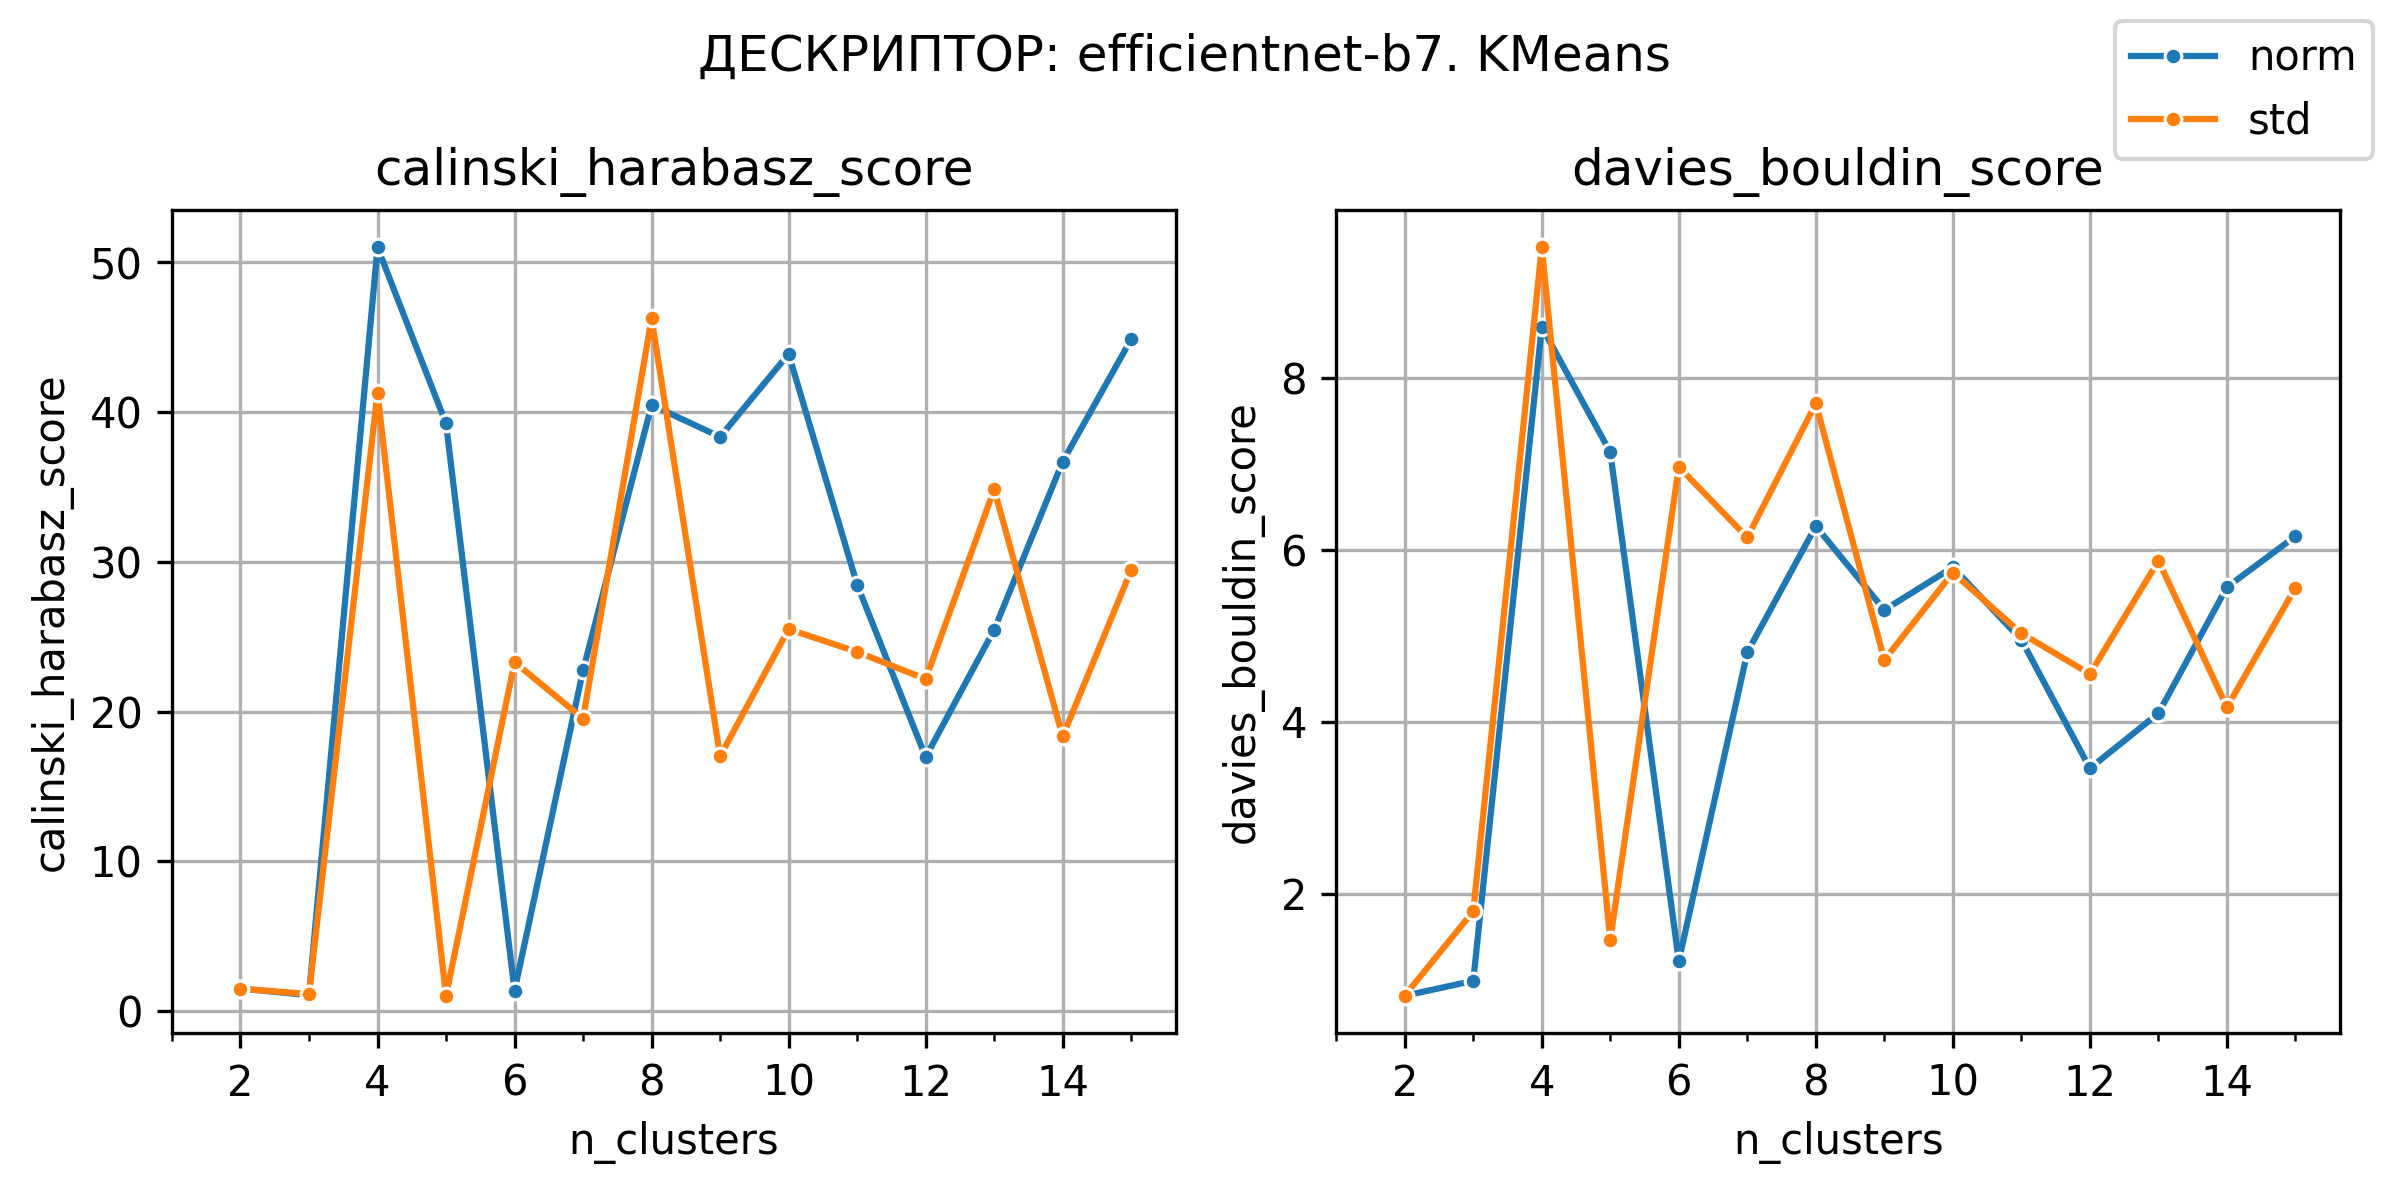

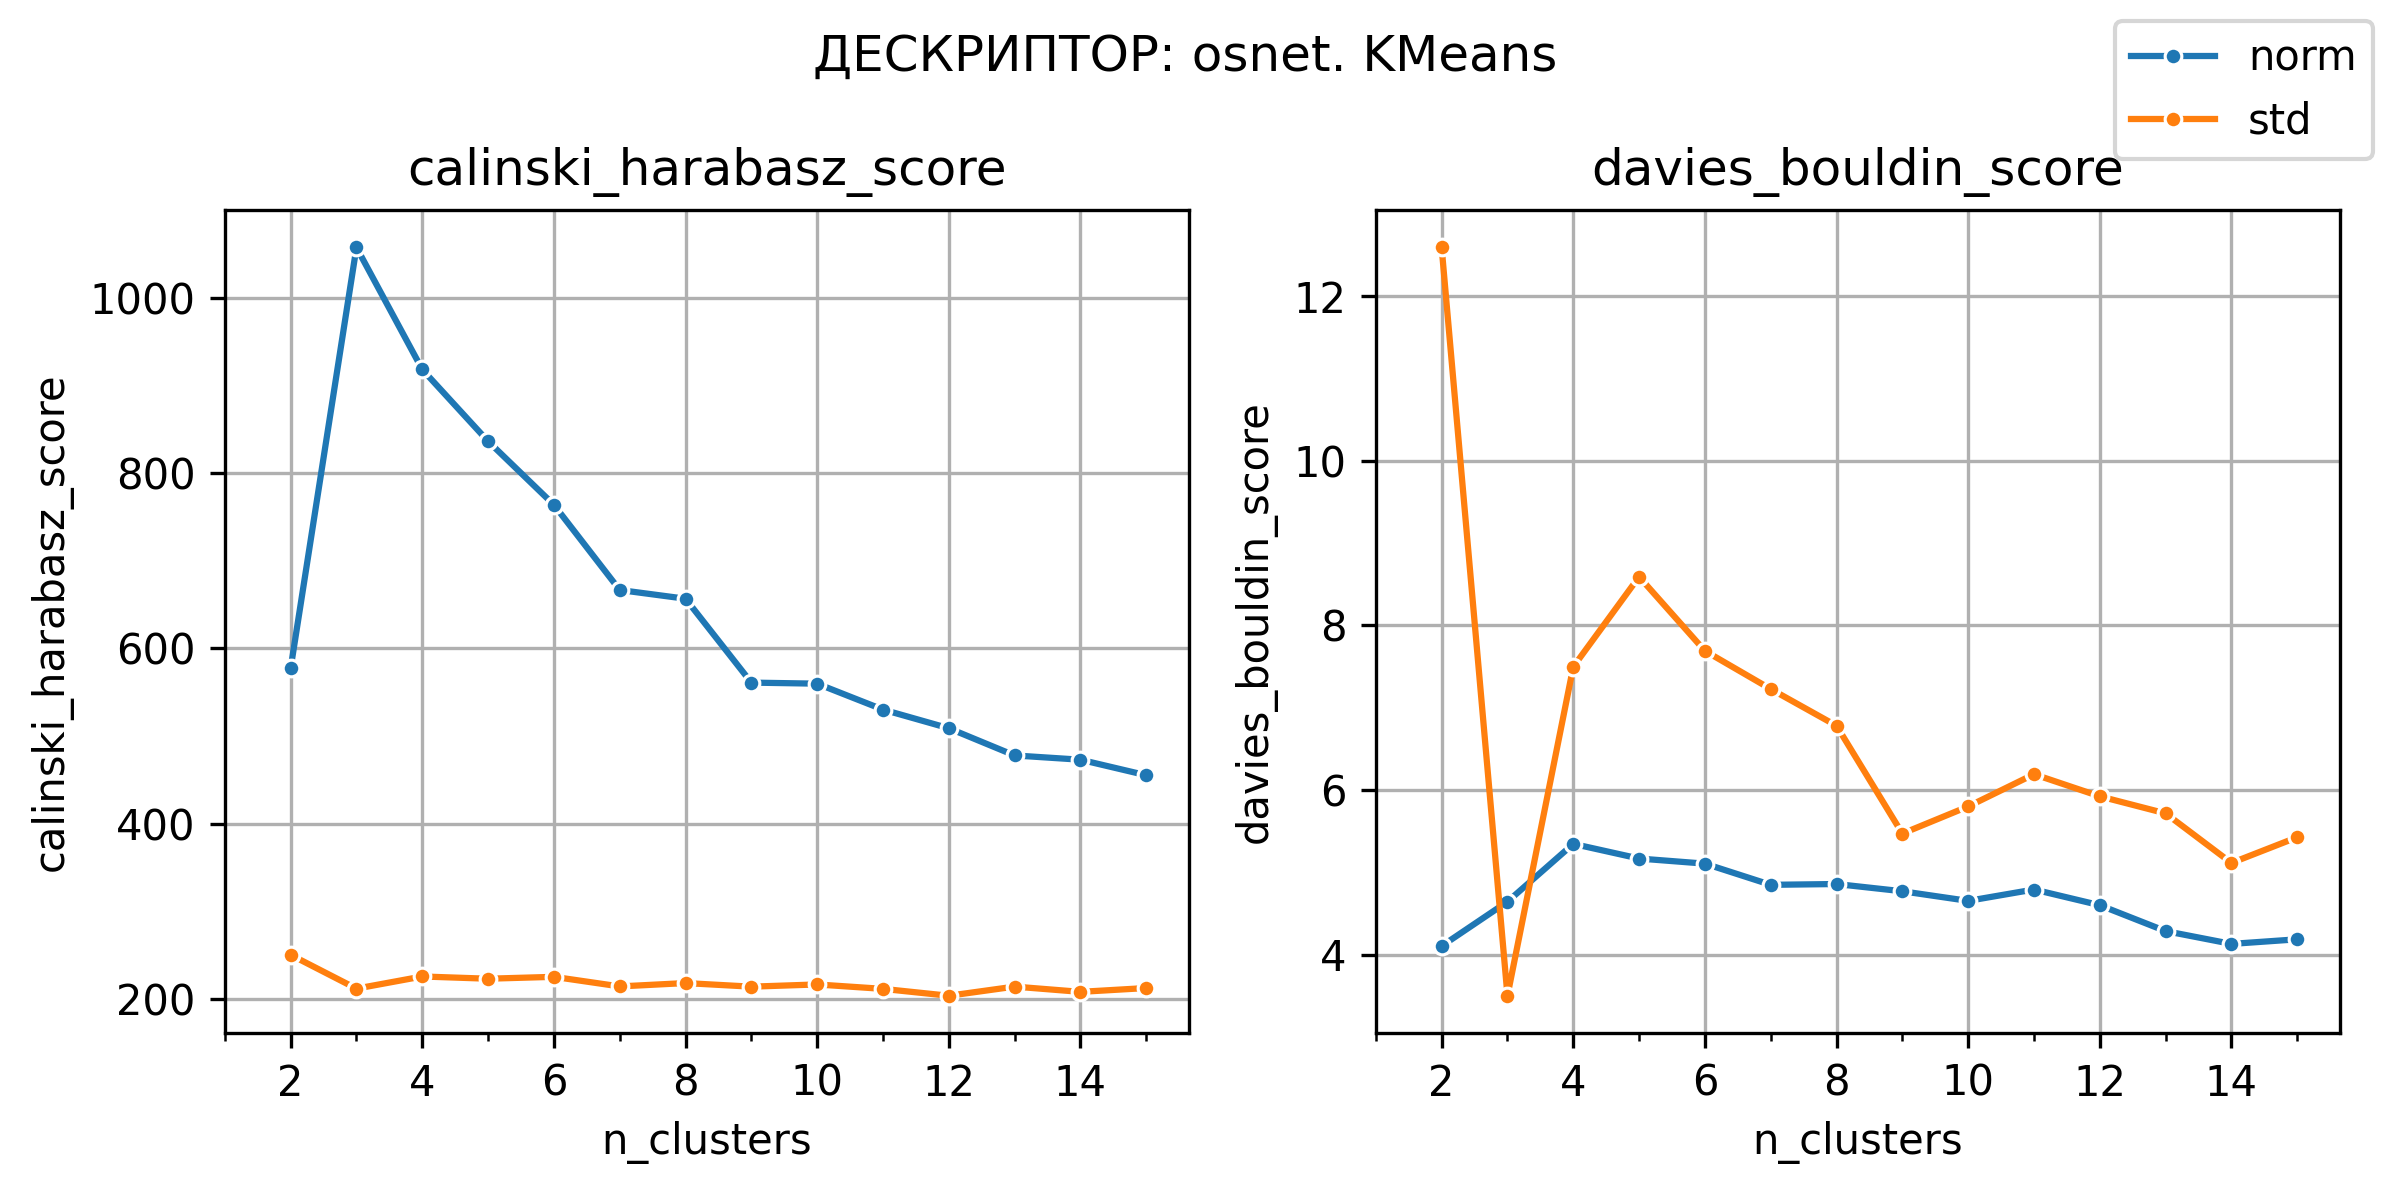

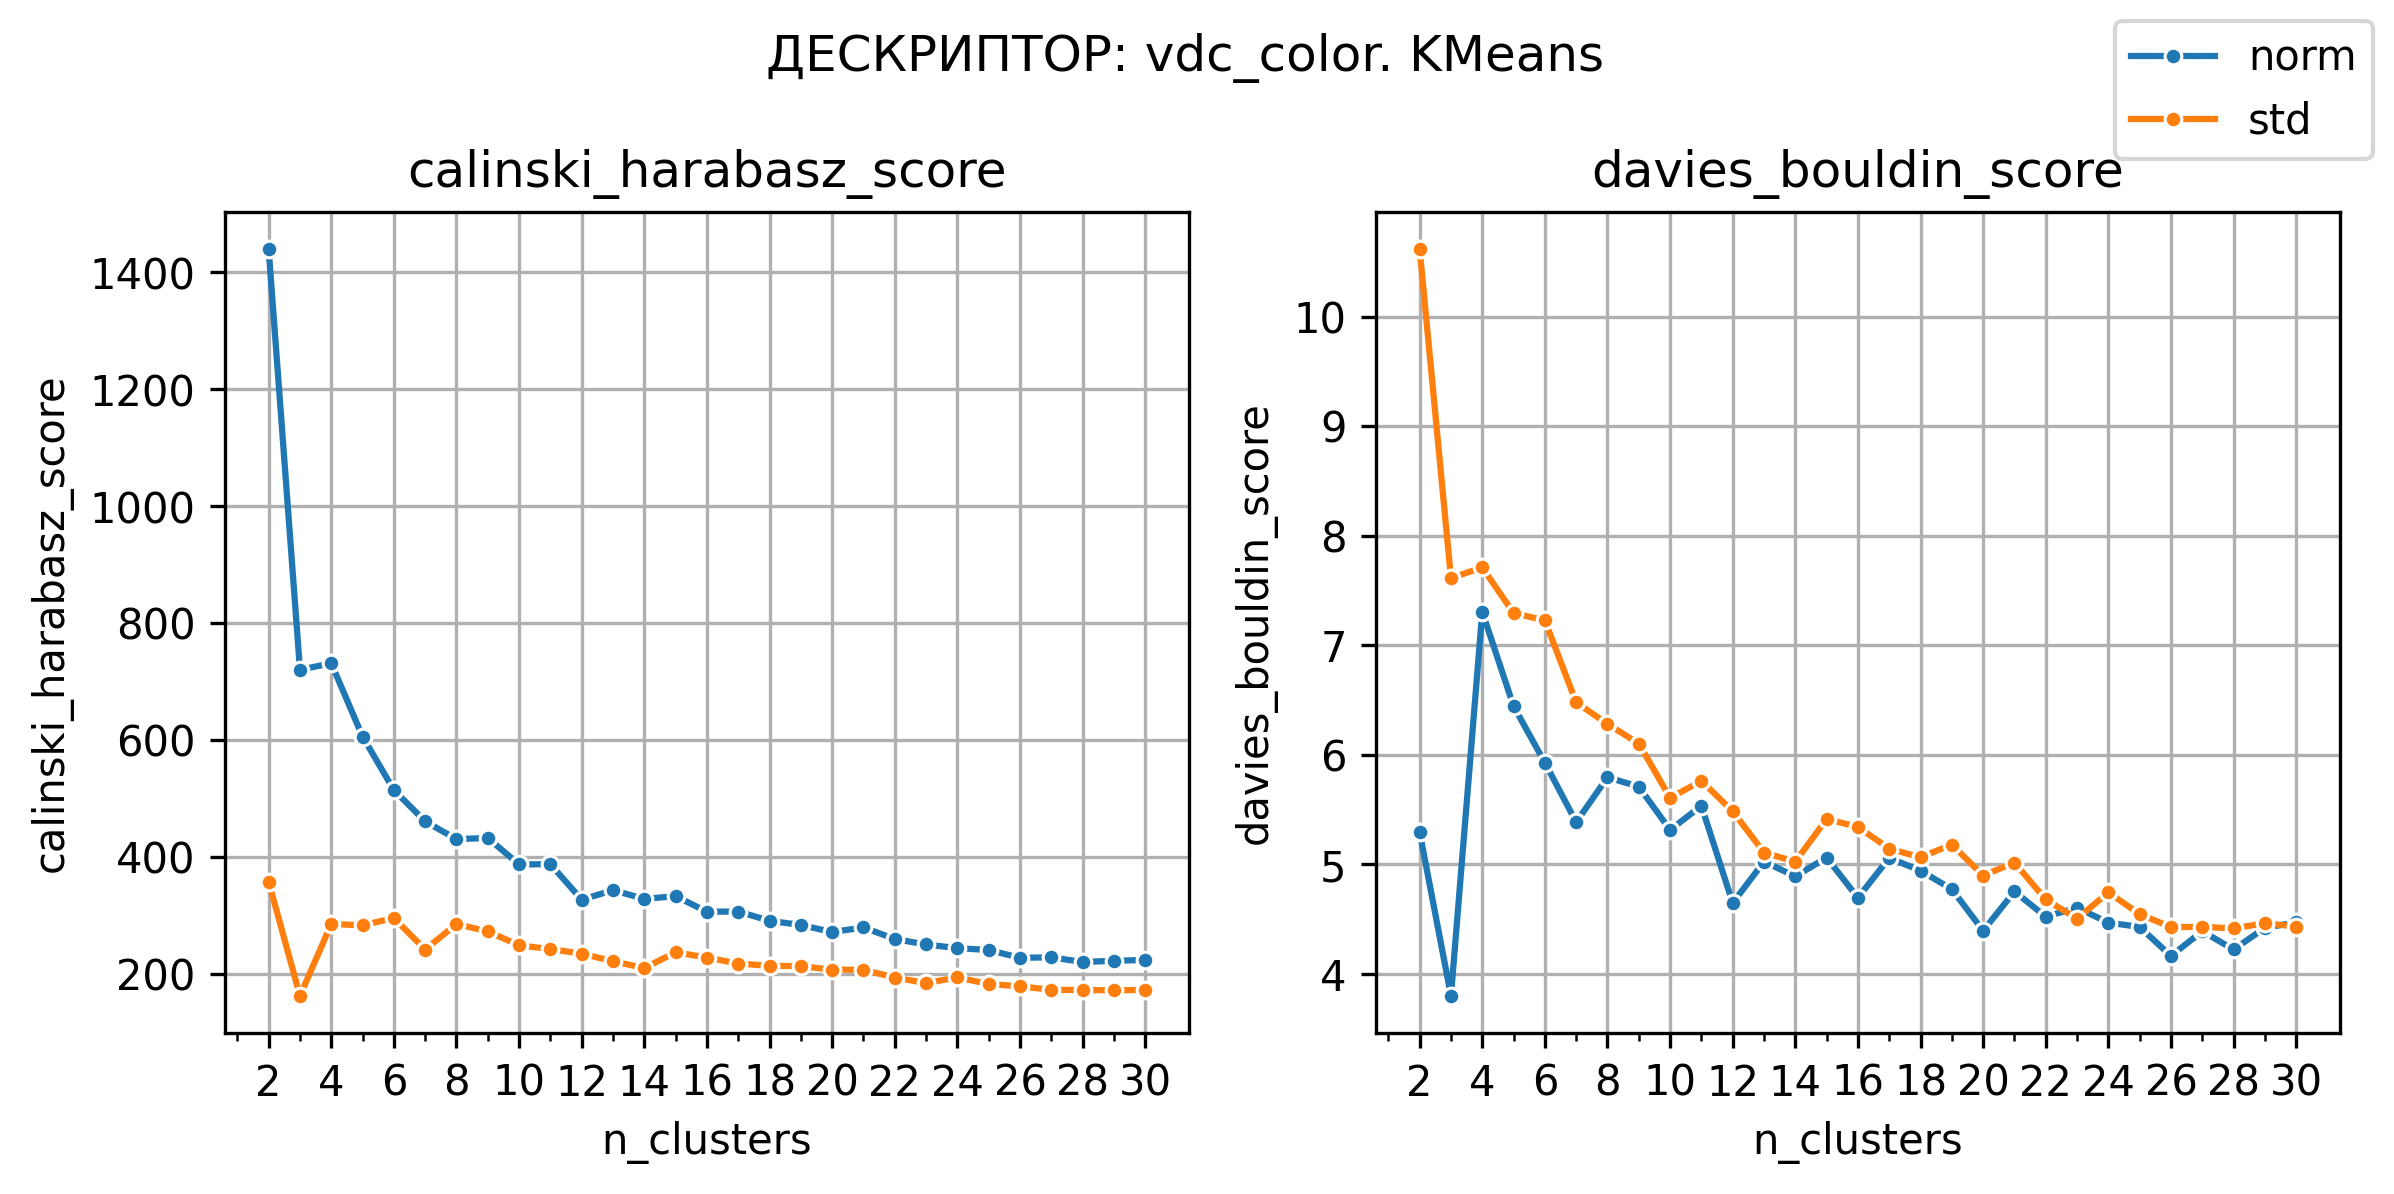

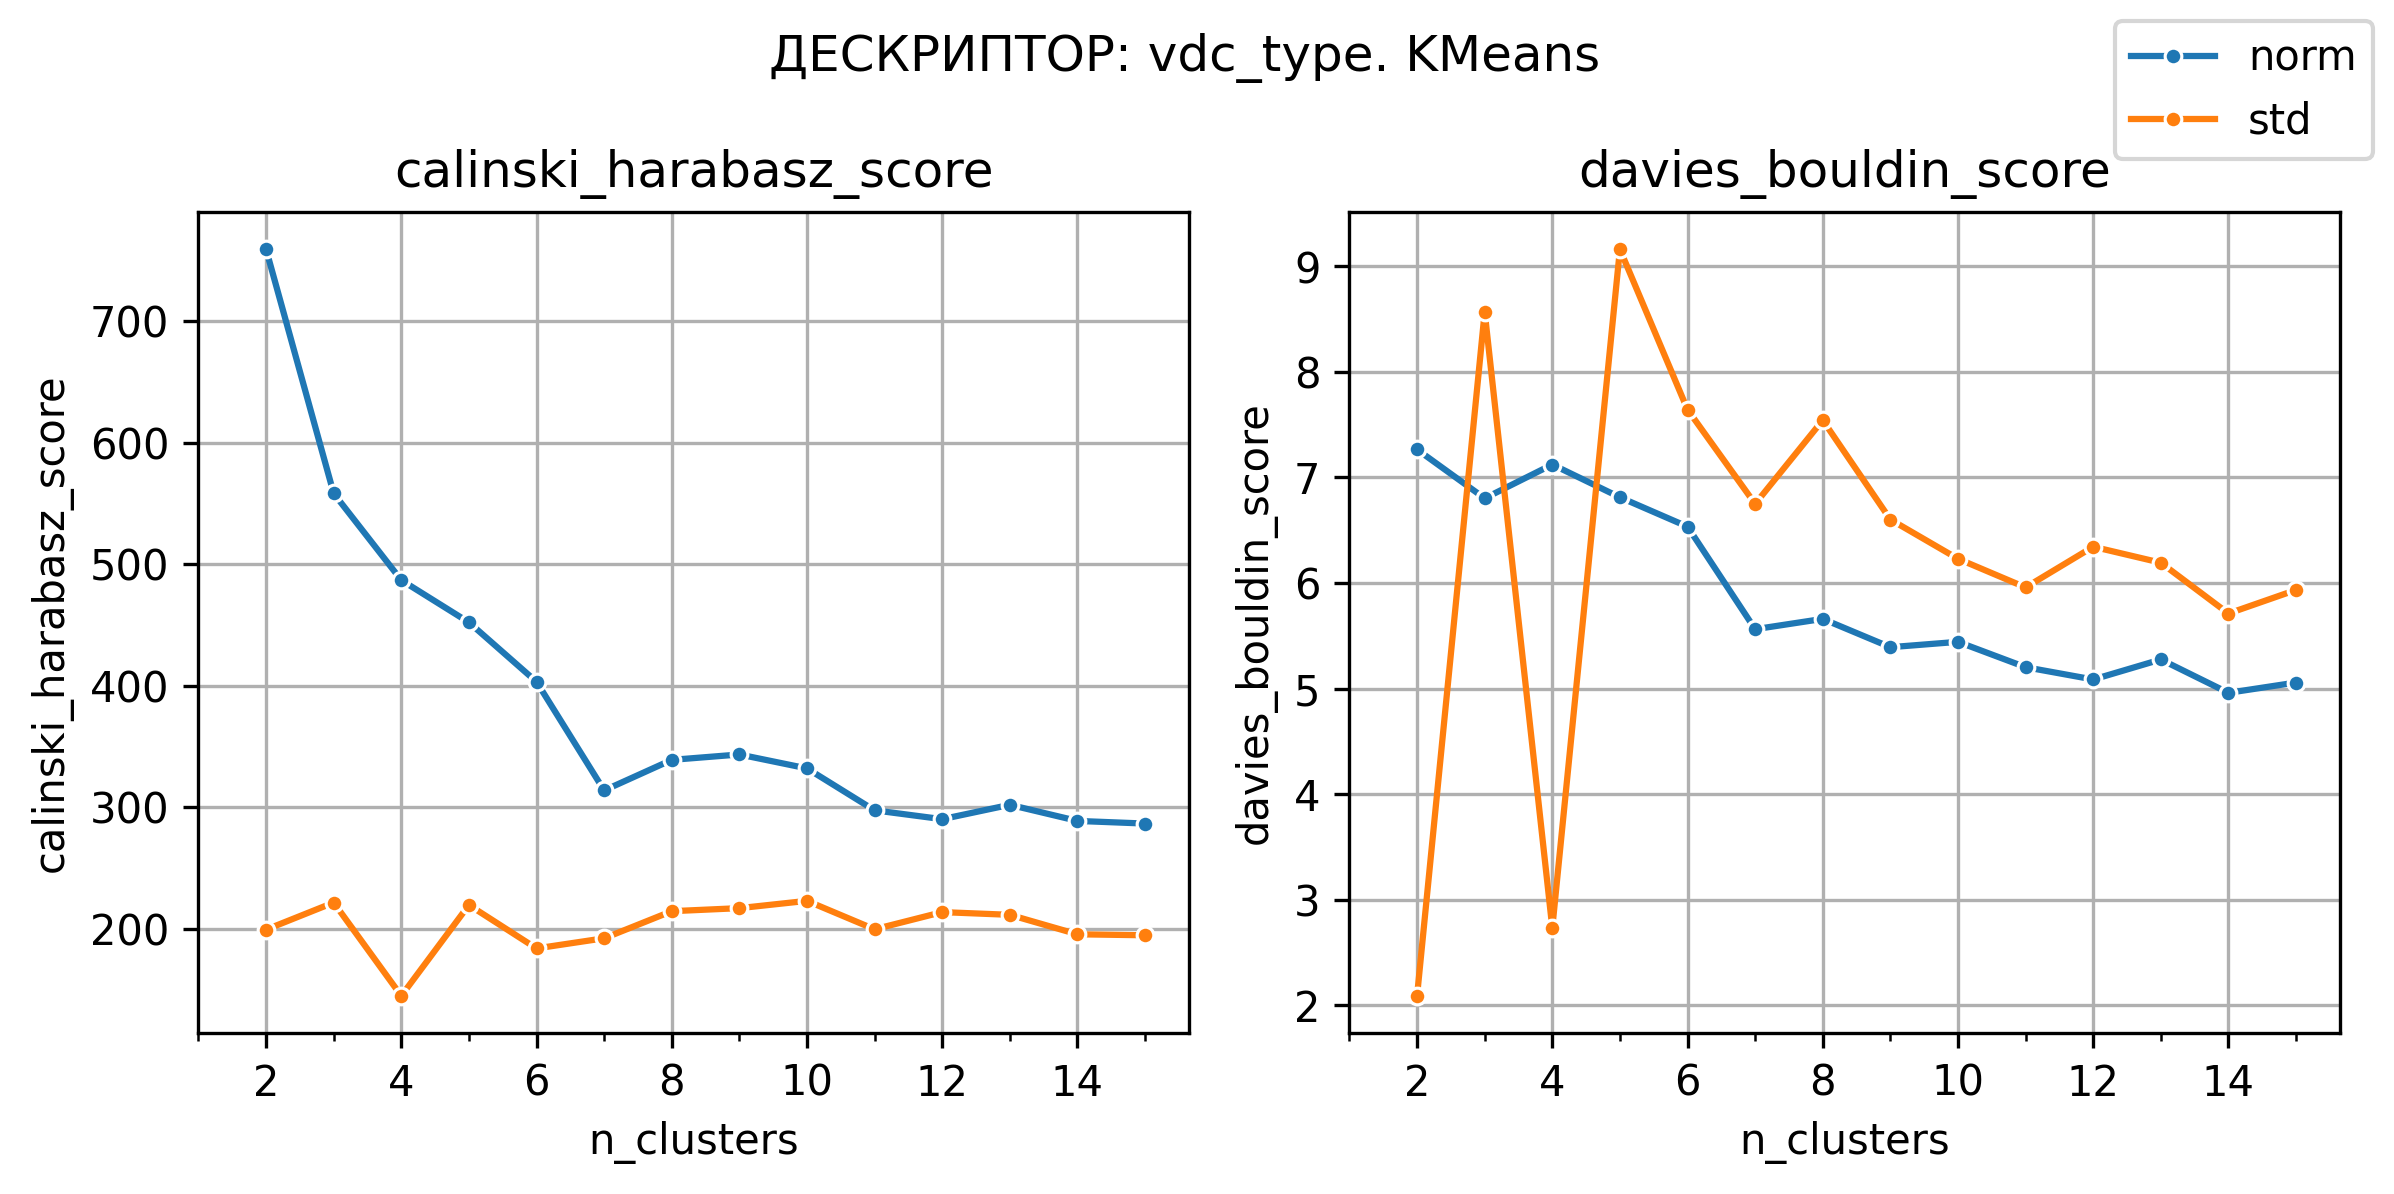

In [22]:
kmeans_df = cluster_results_df[cluster_results_df['cluster_class'] == 'KMeans']

for descriptor in kmeans_df['descriptor'].unique():
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    for i, cluster_class in enumerate(
        kmeans_df['cluster_class'].unique()
    ): 
        data = kmeans_df[
            (kmeans_df['descriptor'] == descriptor) &
                (kmeans_df['cluster_class'] == cluster_class)
        ]
        
        for j, score in enumerate([
            'calinski_harabasz_score', 'davies_bouldin_score'
        ]):
            sns.lineplot(
                data, 
                x='n_clusters', 
                y=score, 
                hue='scaler',
                marker='o',
                markersize=4,
                ax=axes[j],
            )
            axes[j].set_title(f'{score}')
        
    # Setup all axes
    for ax in axes.flat:
        ax.set_xticks(np.arange(2, data['n_clusters'].max()+1, 2))
        ax.set_xticks(np.arange(1, data['n_clusters'].max()+1), minor=True)
        ax.grid()
        ax.get_legend().remove()
    
    lines_labels = axes[1].get_legend_handles_labels()
    lines, labels = lines_labels
    fig.legend(lines, labels)
    
    fig.suptitle(f'ДЕСКРИПТОР: {descriptor}'+'. KMeans')
    plt.tight_layout()

**KMEANS**

**ДЕСКРИПТОР efficientnet-b7**:
- наилучшее масштабирование: "norm"?
- наилучшее число кластеров по метрике Калински — Харабаса: 4
- наилучшее число кластеров по метрике Дэвиса — Болдина: 6
- ПРОВЕРИТЬ: 4, 5, 6, 7, 8, 9, 10

**ДЕСКРИПТОР osnet**:
- наилучшее масштабирование: "norm"
- наилучшее число кластеров по метрике Калински — Харабаса: 3
- наилучшее число кластеров по метрике Дэвиса — Болдина: 2, 14
- ПРОВЕРИТЬ: 2, 3, 5, 7, 10, 14

**ДЕСКРИПТОР vdc_color**:
- наилучшее масштабирование: "norm"
- наилучшее число кластеров по метрике Калински — Харабаса: 2
- наилучшее число кластеров по метрике Дэвиса — Болдина: 3, 26
- ПРОВЕРИТЬ: 2, 3, 5, 7, 10, 12, 16, 20, 26

**ДЕСКРИПТОР vdc_type**:
- наилучшее масштабирование: "norm"
- наилучшее число кластеров по метрике Калински — Харабаса: 2
- наилучшее число кластеров по метрике Дэвиса — Болдина: 14
- ПРОВЕРИТЬ: 2, 3, 5, 7, 9, 14

#### Перейдём теперь к анализу DBSCAN и HDBSCAN

Рассмотрим параметры, при которых обнаруживается 2 и более кластеров (вместе с выбросами):

In [33]:
dbscan_df_rare = cluster_results_df[cluster_results_df['cluster_class'].isin(['DBSCAN', 'HDBSCAN'])]

mask = dbscan_df_rare['n_clusters']>=2

dbscan_df = dbscan_df_rare[mask]

params = pd.DataFrame(
    list(
        dbscan_df['cluster_class_params'].values
    )
)
display(params.describe().T)

print(f'Только {dbscan_df.shape[0] / dbscan_df_rare.shape[0] * 100:.2f}% имеют 2 и более кластеров')

count        mean         std  min   25%   50%    75%    max
eps                96.0    8.802083    9.060754  1.0   2.0   2.0   16.0   32.0
min_samples        96.0  133.750000  164.471018  8.0  16.0  64.0  256.0  512.0
min_cluster_size   17.0   21.647059   15.169629  8.0   8.0  16.0   32.0   64.0

Только 15.52% имеют 2 и более кластеров


Сравним между собой методы масштабирования:

In [45]:
print('calinski_harabasz_score')
display(dbscan_df.groupby('scaler')['calinski_harabasz_score'].agg(['median', 'max']))
print('davies_bouldin_score')
display(dbscan_df.groupby('scaler')['davies_bouldin_score'].agg(['min', 'median']))

calinski_harabasz_score


median         max
scaler                       
norm    70.485664  551.038708
std     62.399098  187.154412

davies_bouldin_score


min    median
scaler                    
norm    0.419597  5.700566
std     1.137403  6.224487

Видим, что по обоим метрикам лучше 'norm'-метод масштабирования ('MinMaxScaler')

In [46]:
norm_dbscan_df = dbscan_df[dbscan_df['scaler'] == 'norm']
norm_dbscan_df.shape

(58, 8)

In [61]:
display_models(norm_dbscan_df)

ДЕСКРИПТОР: efficientnet-b7


cluster_class                cluster_class_params  n_clusters  \
31         DBSCAN    {'eps': 2.0, 'min_samples': 8.0}           2   
91         DBSCAN  {'eps': 2.0, 'min_samples': 256.0}           2   
67         DBSCAN   {'eps': 2.0, 'min_samples': 64.0}           2   
43         DBSCAN   {'eps': 2.0, 'min_samples': 16.0}           2   
103        DBSCAN  {'eps': 2.0, 'min_samples': 512.0}           2   
79         DBSCAN  {'eps': 2.0, 'min_samples': 128.0}           2   
55         DBSCAN   {'eps': 2.0, 'min_samples': 32.0}           2   

     calinski_harabasz_score  davies_bouldin_score  
31                 74.645792             20.025297  
91                 74.643309             20.045097  
67                 74.632674             20.034368  
43                 74.630429             20.028929  
103                74.630070             20.060416  
79                 74.626737             20.038402  
55                 74.617738             20.032258

ДЕСКРИПТОР: osnet


cluster_class                cluster_class_params  n_clusters  \
409       HDBSCAN            {'min_cluster_size': 64}           3   
408       HDBSCAN            {'min_cluster_size': 32}          21   
407       HDBSCAN            {'min_cluster_size': 16}          10   
406       HDBSCAN             {'min_cluster_size': 8}          18   
312        DBSCAN  {'eps': 1.0, 'min_samples': 512.0}           2   
300        DBSCAN  {'eps': 1.0, 'min_samples': 256.0}           2   
288        DBSCAN  {'eps': 1.0, 'min_samples': 128.0}           3   
276        DBSCAN   {'eps': 1.0, 'min_samples': 64.0}           5   
264        DBSCAN   {'eps': 1.0, 'min_samples': 32.0}           6   
252        DBSCAN   {'eps': 1.0, 'min_samples': 16.0}          14   
240        DBSCAN    {'eps': 1.0, 'min_samples': 8.0}          39   
301        DBSCAN  {'eps': 2.0, 'min_samples': 256.0}           2   
313        DBSCAN  {'eps': 2.0, 'min_samples': 512.0}           2   
277        DBSCAN   {'eps': 2.0, 'min_samples': 64.0}           2   
289        DBSCAN  {'eps': 2.0, 'min_samples': 128.0}           2   
241        DBSCAN    {'eps': 2.0, 'min_samples': 8.0}           2   
253        DBSCAN   {'eps': 2.0, 'min_samples': 16.0}           2   
265        DBSCAN   {'eps': 2.0, 'min_samples': 32.0}           2   

     calinski_harabasz_score  davies_bouldin_score  
409               270.586262              7.274930  
408               100.451778              3.012364  
407                90.426950              3.065218  
406                66.353590              2.474021  
312               551.038708              7.305536  
300               530.202636              8.269678  
288               283.963413              6.802102  
276               182.593805              5.069501  
264               128.885175              4.865930  
252                74.966108              3.139562  
240                39.189893              2.215487  
301                25.872725              1.972522  
313                25.012501              2.109496  
277                15.459471              1.906815  
289                14.808030              2.118638  
241                 7.840548              2.120519  
253                 7.840548              2.120519  
265                 7.840548              2.120519

ДЕСКРИПТОР: vdc_color


cluster_class                cluster_class_params  n_clusters  \
648       HDBSCAN            {'min_cluster_size': 32}           3   
646       HDBSCAN             {'min_cluster_size': 8}           3   
552        DBSCAN  {'eps': 1.0, 'min_samples': 512.0}           2   
540        DBSCAN  {'eps': 1.0, 'min_samples': 256.0}           2   
528        DBSCAN  {'eps': 1.0, 'min_samples': 128.0}           2   
516        DBSCAN   {'eps': 1.0, 'min_samples': 64.0}           2   
504        DBSCAN   {'eps': 1.0, 'min_samples': 32.0}           2   
492        DBSCAN   {'eps': 1.0, 'min_samples': 16.0}           2   
480        DBSCAN    {'eps': 1.0, 'min_samples': 8.0}           3   
481        DBSCAN    {'eps': 2.0, 'min_samples': 8.0}           2   
493        DBSCAN   {'eps': 2.0, 'min_samples': 16.0}           2   
505        DBSCAN   {'eps': 2.0, 'min_samples': 32.0}           2   
517        DBSCAN   {'eps': 2.0, 'min_samples': 64.0}           2   
529        DBSCAN  {'eps': 2.0, 'min_samples': 128.0}           2   
541        DBSCAN  {'eps': 2.0, 'min_samples': 256.0}           2   
553        DBSCAN  {'eps': 2.0, 'min_samples': 512.0}           2   

     calinski_harabasz_score  davies_bouldin_score  
648                88.844325              9.717435  
646                63.902857              7.969127  
552               187.506982             14.634818  
540               185.960690             14.563257  
528               182.619923             14.551272  
516               179.982592             14.513650  
504               176.504317             14.494997  
492               172.789296             14.467744  
480                86.197955             10.374620  
481                 5.513926              0.419597  
493                 5.513926              0.419597  
505                 5.513926              0.419597  
517                 5.513926              0.419597  
529                 5.513926              0.419597  
541                 5.513926              0.419597  
553                 5.513926              0.419597

ДЕСКРИПТОР: vdc_type


cluster_class                cluster_class_params  n_clusters  \
858       HDBSCAN            {'min_cluster_size': 32}           5   
856       HDBSCAN             {'min_cluster_size': 8}           6   
857       HDBSCAN            {'min_cluster_size': 16}           4   
750        DBSCAN  {'eps': 1.0, 'min_samples': 256.0}           2   
738        DBSCAN  {'eps': 1.0, 'min_samples': 128.0}           2   
726        DBSCAN   {'eps': 1.0, 'min_samples': 64.0}           2   
762        DBSCAN  {'eps': 1.0, 'min_samples': 512.0}           2   
714        DBSCAN   {'eps': 1.0, 'min_samples': 32.0}           3   
739        DBSCAN  {'eps': 2.0, 'min_samples': 128.0}           2   
751        DBSCAN  {'eps': 2.0, 'min_samples': 256.0}           2   
763        DBSCAN  {'eps': 2.0, 'min_samples': 512.0}           2   
727        DBSCAN   {'eps': 2.0, 'min_samples': 64.0}           2   
702        DBSCAN   {'eps': 1.0, 'min_samples': 16.0}           5   
715        DBSCAN   {'eps': 2.0, 'min_samples': 32.0}           2   
703        DBSCAN   {'eps': 2.0, 'min_samples': 16.0}           2   
690        DBSCAN    {'eps': 1.0, 'min_samples': 8.0}           9   
691        DBSCAN    {'eps': 2.0, 'min_samples': 8.0}           2   

     calinski_harabasz_score  davies_bouldin_score  
858                57.190837              8.486809  
856                44.341713              6.331630  
857                40.215543              7.689987  
750               182.631696             14.678003  
738               181.415734             14.963861  
726               178.883398             15.078952  
762               171.461884             14.580522  
714                99.195071             10.746867  
739                57.241166              1.975067  
751                56.619278              2.084929  
763                56.619278              2.084929  
727                54.164609              1.997177  
702                52.414134              7.274509  
715                36.146761              2.162484  
703                33.103030              2.112247  
690                30.786194              4.783580  
691                26.142021              2.226000

Уточним сетку и проведём более качественный анализ (c бОльшим количеством данных)

In [2]:
selected_params = {
    'efficientnet-b7': {
        DBSCAN: {
            'eps': [2.],
            'min_samples': [64, 256],    
        },
        KMeans: {'n_clusters': [3, 4, 5, 6, 7, 8, 9, 10]},
    },
    
    'osnet': {
        DBSCAN: {
            'eps': [1.],
            'min_samples': 4**np.arange(2, 7),    
        },
        HDBSCAN: {
            'min_cluster_size': [16, 24, 32, 48, 64, 96],
        },
        KMeans: {'n_clusters': [2, 3, 5, 7, 10, 14]},
    },
    
    'vdc_color': {
        DBSCAN: {
            'eps': [1.],
            'min_samples': 4**np.arange(2, 7),    
        },
        HDBSCAN: {
            'min_cluster_size': [8, 24, 32, 48],
        },
        KMeans: {'n_clusters': [2, 3, 5, 7, 10, 12, 16, 20, 26]},
    },
    
    'vdc_type':{
        DBSCAN: {
            'eps': [1.],
            'min_samples': 2**np.arange(5, 12),    
        },
        HDBSCAN: {
            'min_cluster_size': [8, 12, 16, 24, 32, 48],
        },
        KMeans: {'n_clusters': [2, 3, 5, 7, 9, 14]},
    },
}

In [3]:
cluster_results = conduct_grid_search(
    selected_params,
    data_fraction=0.5,
    scaler=['norm'],
    delay=2., # Extra time to free GPU-memory
)

cluster_results_df = pd.DataFrame(cluster_results)
cluster_results_df.to_csv('results/refined_scores.csv', index=False)
cluster_results_df.head()

ДЕСКРИПТОР efficientnet-b7
Модель кластеризации: DBSCAN
Метод масштабирования: norm
{'eps': 2.0, 'min_samples': 64.0} ...	DONE!
{'eps': 2.0, 'min_samples': 256.0} ...	DONE!

Модель кластеризации: KMeans
Метод масштабирования: norm
{'n_clusters': 3} ...	DONE!
{'n_clusters': 4} ...	DONE!
{'n_clusters': 5} ...	DONE!
{'n_clusters': 6} ...	DONE!
{'n_clusters': 7} ...	DONE!
{'n_clusters': 8} ...	DONE!
{'n_clusters': 9} ...	DONE!
{'n_clusters': 10} ...	DONE!


ДЕСКРИПТОР osnet
Модель кластеризации: DBSCAN
Метод масштабирования: norm
{'eps': 1.0, 'min_samples': 16.0} ...	DONE!
{'eps': 1.0, 'min_samples': 64.0} ...	DONE!
{'eps': 1.0, 'min_samples': 256.0} ...	DONE!
{'eps': 1.0, 'min_samples': 1024.0} ...	DONE!
{'eps': 1.0, 'min_samples': 4096.0} ...	DONE!

Модель кластеризации: HDBSCAN
Метод масштабирования: norm
{'min_cluster_size': 16} ...	DONE!
{'min_cluster_size': 24} ...	DONE!
{'min_cluster_size': 32} ...	DONE!
{'min_cluster_size': 48} ...	DONE!
{'min_cluster_size': 64} ...	DONE!
{'min_clu

descriptor scaler cluster_class                cluster_class_params  \
0  efficientnet-b7   norm        DBSCAN   {'eps': 2.0, 'min_samples': 64.0}   
1  efficientnet-b7   norm        DBSCAN  {'eps': 2.0, 'min_samples': 256.0}   
2  efficientnet-b7   norm        KMeans                   {'n_clusters': 3}   
3  efficientnet-b7   norm        KMeans                   {'n_clusters': 4}   
4  efficientnet-b7   norm        KMeans                   {'n_clusters': 5}   

                                              labels  n_clusters  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           2   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           2   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...           3   
3  [1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, ...           4   
4  [1, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 4, ...           5   

   calinski_harabasz_score  davies_bouldin_score  
0               188.191154             13.902225  
1               188.242287             13.903033  
2                 1.607793              0.798016  
3               316.746404              7.763142  
4               235.362905              6.611170

#### Проанализируем полученные результаты:

ДЕСКРИПТОР: efficientnet-b7


cluster_class                cluster_class_params  n_clusters  \
5        KMeans                   {'n_clusters': 6}           6   
3        KMeans                   {'n_clusters': 4}           4   
7        KMeans                   {'n_clusters': 8}           8   
6        KMeans                   {'n_clusters': 7}           7   
8        KMeans                   {'n_clusters': 9}           9   
4        KMeans                   {'n_clusters': 5}           5   
9        KMeans                  {'n_clusters': 10}          10   
2        KMeans                   {'n_clusters': 3}           3   
1        DBSCAN  {'eps': 2.0, 'min_samples': 256.0}           2   
0        DBSCAN   {'eps': 2.0, 'min_samples': 64.0}           2   

   calinski_harabasz_score  davies_bouldin_score  
5               323.874051              7.066463  
3               316.746404              7.763142  
7               297.842530              6.501464  
6               260.433642              6.279718  
8               260.320031              5.936649  
4               235.362905              6.611170  
9               106.218195              3.603253  
2                 1.607793              0.798016  
1               188.242287             13.903033  
0               188.191154             13.902225

ДЕСКРИПТОР: osnet


cluster_class                 cluster_class_params  n_clusters  \
21        KMeans                    {'n_clusters': 2}           2   
22        KMeans                    {'n_clusters': 3}           3   
23        KMeans                    {'n_clusters': 5}           5   
24        KMeans                    {'n_clusters': 7}           7   
25        KMeans                   {'n_clusters': 10}          10   
26        KMeans                   {'n_clusters': 14}          14   
20       HDBSCAN             {'min_cluster_size': 96}           6   
19       HDBSCAN             {'min_cluster_size': 64}          11   
16       HDBSCAN             {'min_cluster_size': 24}           3   
18       HDBSCAN             {'min_cluster_size': 48}           4   
17       HDBSCAN             {'min_cluster_size': 32}          11   
15       HDBSCAN             {'min_cluster_size': 16}          21   
14        DBSCAN  {'eps': 1.0, 'min_samples': 4096.0}           2   
13        DBSCAN  {'eps': 1.0, 'min_samples': 1024.0}           3   
12        DBSCAN   {'eps': 1.0, 'min_samples': 256.0}           3   
11        DBSCAN    {'eps': 1.0, 'min_samples': 64.0}          12   
10        DBSCAN    {'eps': 1.0, 'min_samples': 16.0}          29   

    calinski_harabasz_score  davies_bouldin_score  
21              8826.250728              4.704896  
22              6114.874997              5.595897  
23              4631.677824              5.065199  
24              3757.845576              4.643745  
25              2799.040327              3.888967  
26              2562.042222              3.782618  
20               643.774687              4.186496  
19               526.730865              3.280837  
16               398.234948              4.917328  
18               257.697278              4.140776  
17               223.173914              2.936302  
15               204.535079              2.279254  
14              3054.218185              8.030786  
13              1886.815306              6.263772  
12              1236.050923              6.141882  
11               378.137287              2.857407  
10               192.127693              2.217009

ДЕСКРИПТОР: vdc_color


cluster_class                 cluster_class_params  n_clusters  \
36        KMeans                    {'n_clusters': 2}           2   
37        KMeans                    {'n_clusters': 3}           3   
38        KMeans                    {'n_clusters': 5}           5   
39        KMeans                    {'n_clusters': 7}           7   
40        KMeans                   {'n_clusters': 10}          10   
41        KMeans                   {'n_clusters': 12}          12   
42        KMeans                   {'n_clusters': 16}          16   
43        KMeans                   {'n_clusters': 20}          20   
44        KMeans                   {'n_clusters': 26}          26   
35       HDBSCAN             {'min_cluster_size': 48}           4   
34       HDBSCAN             {'min_cluster_size': 32}           3   
32       HDBSCAN              {'min_cluster_size': 8}           4   
33       HDBSCAN             {'min_cluster_size': 24}           3   
31        DBSCAN  {'eps': 1.0, 'min_samples': 4096.0}           2   
30        DBSCAN  {'eps': 1.0, 'min_samples': 1024.0}           2   
29        DBSCAN   {'eps': 1.0, 'min_samples': 256.0}           2   
28        DBSCAN    {'eps': 1.0, 'min_samples': 64.0}           2   
27        DBSCAN    {'eps': 1.0, 'min_samples': 16.0}           3   

    calinski_harabasz_score  davies_bouldin_score  
36              8249.985166              4.944693  
37              5180.114847              6.161024  
38              3571.589613              6.385101  
39              2873.707138              5.728265  
40              2187.842528              5.268080  
41              2000.349786              5.376854  
42              1729.056917              4.964595  
43              1545.542042              4.706451  
44              1259.382168              4.418783  
35               299.738281              6.571667  
34               246.283480              6.166338  
32               172.176196              4.276900  
33               147.684732              6.066604  
31               863.156132             10.148096  
30               828.276503              9.814798  
29               796.728342              9.590158  
28               759.113675              9.452876  
27               353.310235              6.972259

ДЕСКРИПТОР: vdc_type


cluster_class                 cluster_class_params  n_clusters  \
58        KMeans                    {'n_clusters': 2}           2   
59        KMeans                    {'n_clusters': 3}           3   
60        KMeans                    {'n_clusters': 5}           5   
61        KMeans                    {'n_clusters': 7}           7   
62        KMeans                    {'n_clusters': 9}           9   
63        KMeans                   {'n_clusters': 14}          14   
53       HDBSCAN             {'min_cluster_size': 12}           3   
54       HDBSCAN             {'min_cluster_size': 16}           3   
55       HDBSCAN             {'min_cluster_size': 24}           3   
52       HDBSCAN              {'min_cluster_size': 8}           3   
56       HDBSCAN             {'min_cluster_size': 32}           3   
57       HDBSCAN             {'min_cluster_size': 48}           3   
51        DBSCAN  {'eps': 1.0, 'min_samples': 2048.0}           2   
50        DBSCAN  {'eps': 1.0, 'min_samples': 1024.0}           2   
49        DBSCAN   {'eps': 1.0, 'min_samples': 512.0}           2   
48        DBSCAN   {'eps': 1.0, 'min_samples': 256.0}           2   
47        DBSCAN   {'eps': 1.0, 'min_samples': 128.0}           2   
46        DBSCAN    {'eps': 1.0, 'min_samples': 64.0}           2   
45        DBSCAN    {'eps': 1.0, 'min_samples': 32.0}           3   

    calinski_harabasz_score  davies_bouldin_score  
58              4437.918366              6.688266  
59              2985.904864              6.975793  
60              2250.559044              6.750806  
61              1911.105297              6.181948  
62              1708.747348              5.959310  
63              1428.907731              5.202231  
53               272.185724              6.611087  
54               271.448544              6.516542  
55               268.185146              6.371606  
52               267.859108              6.738350  
56               204.984891              5.459230  
57               204.984891              5.459230  
51               699.504340             12.031910  
50               693.413011             11.612353  
49               681.801722             11.234925  
48               676.540830             10.798240  
47               646.176238             10.543256  
46               603.274346             10.361602  
45               307.193289              7.351312

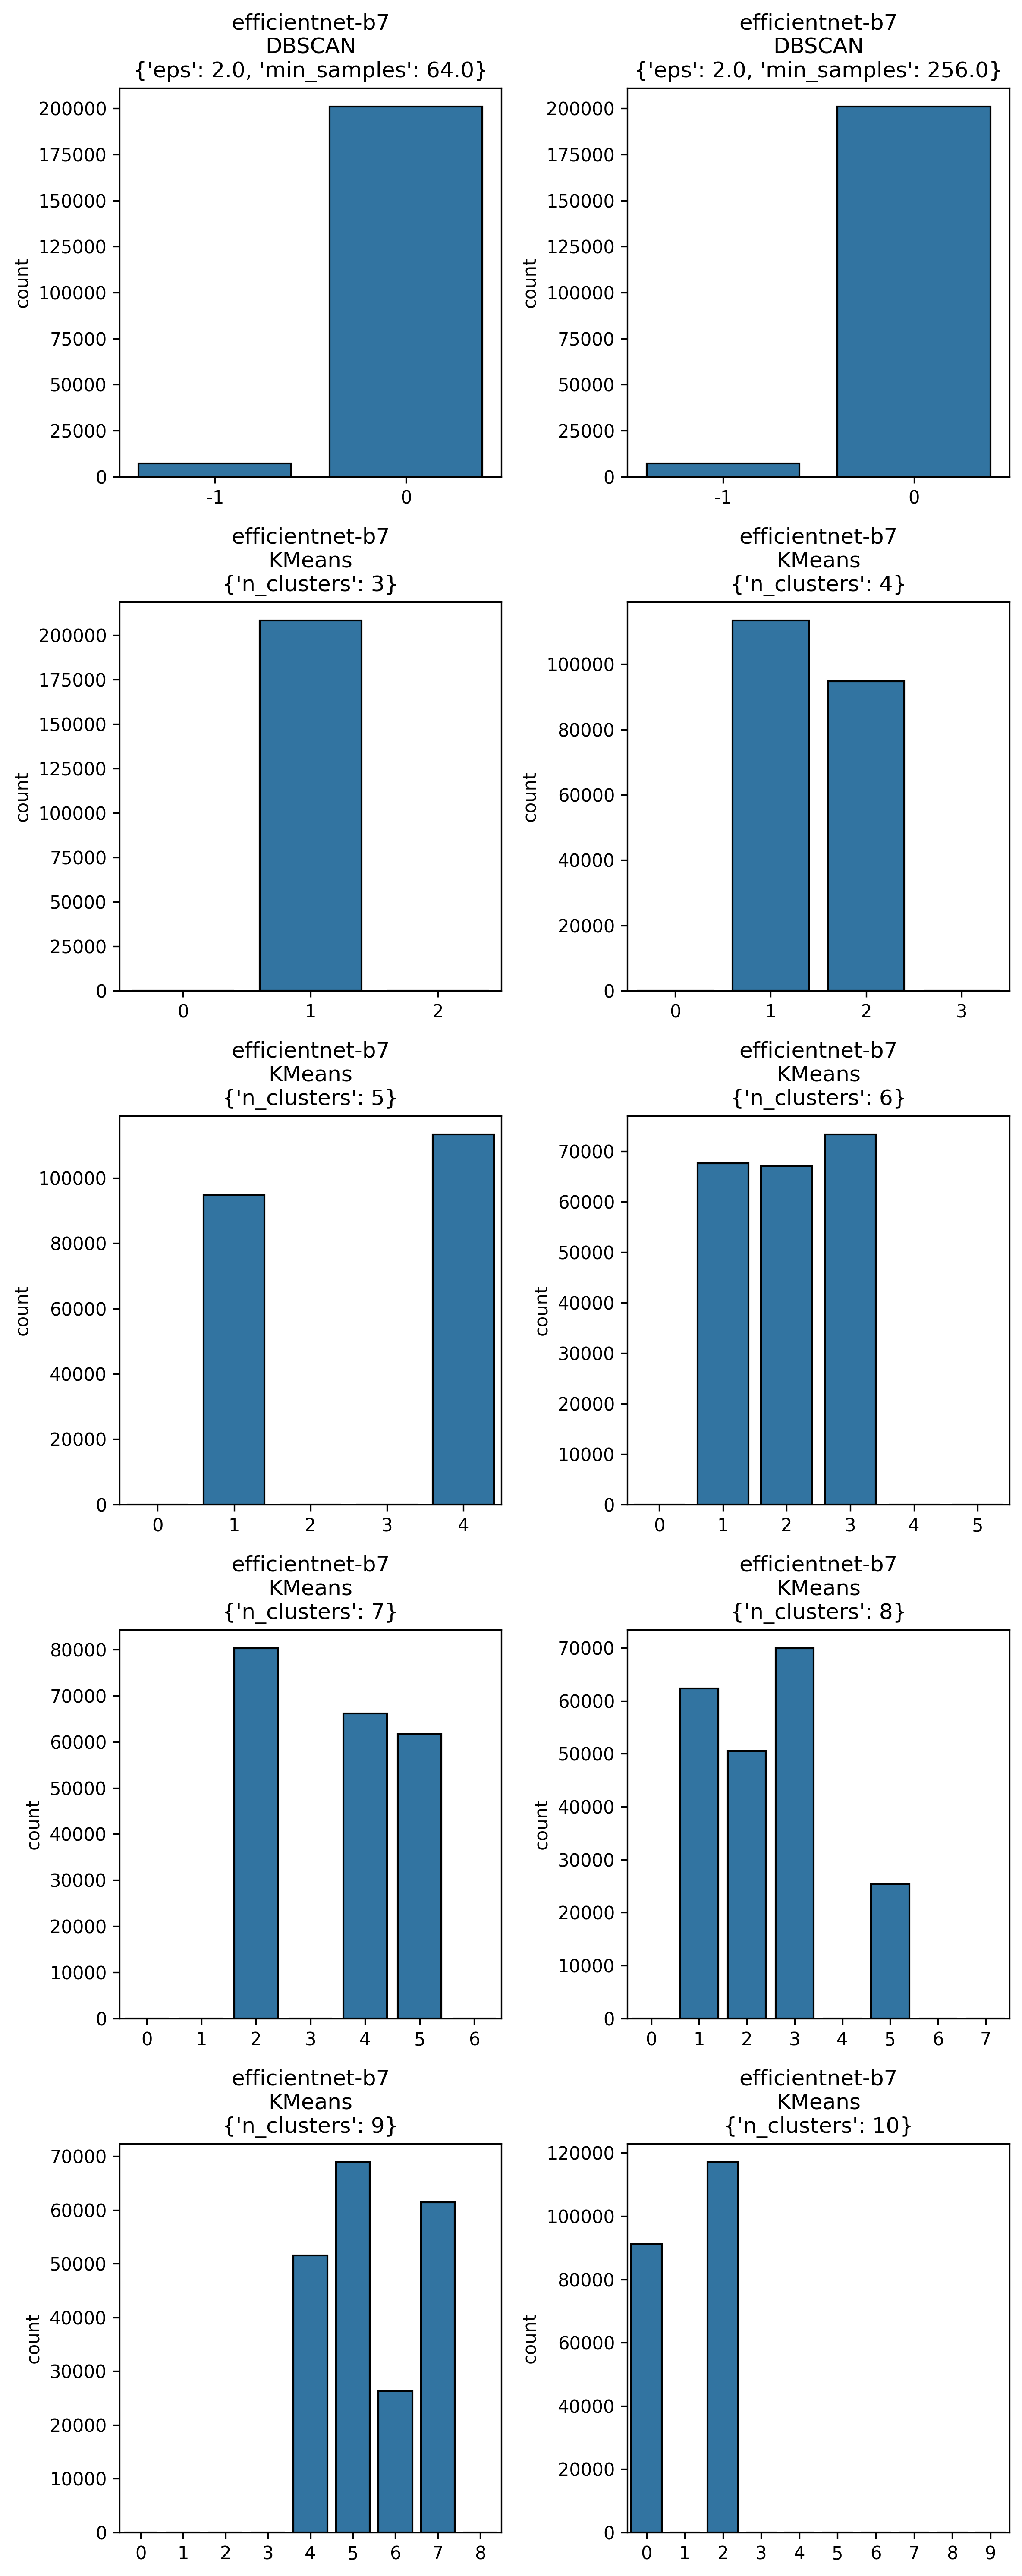

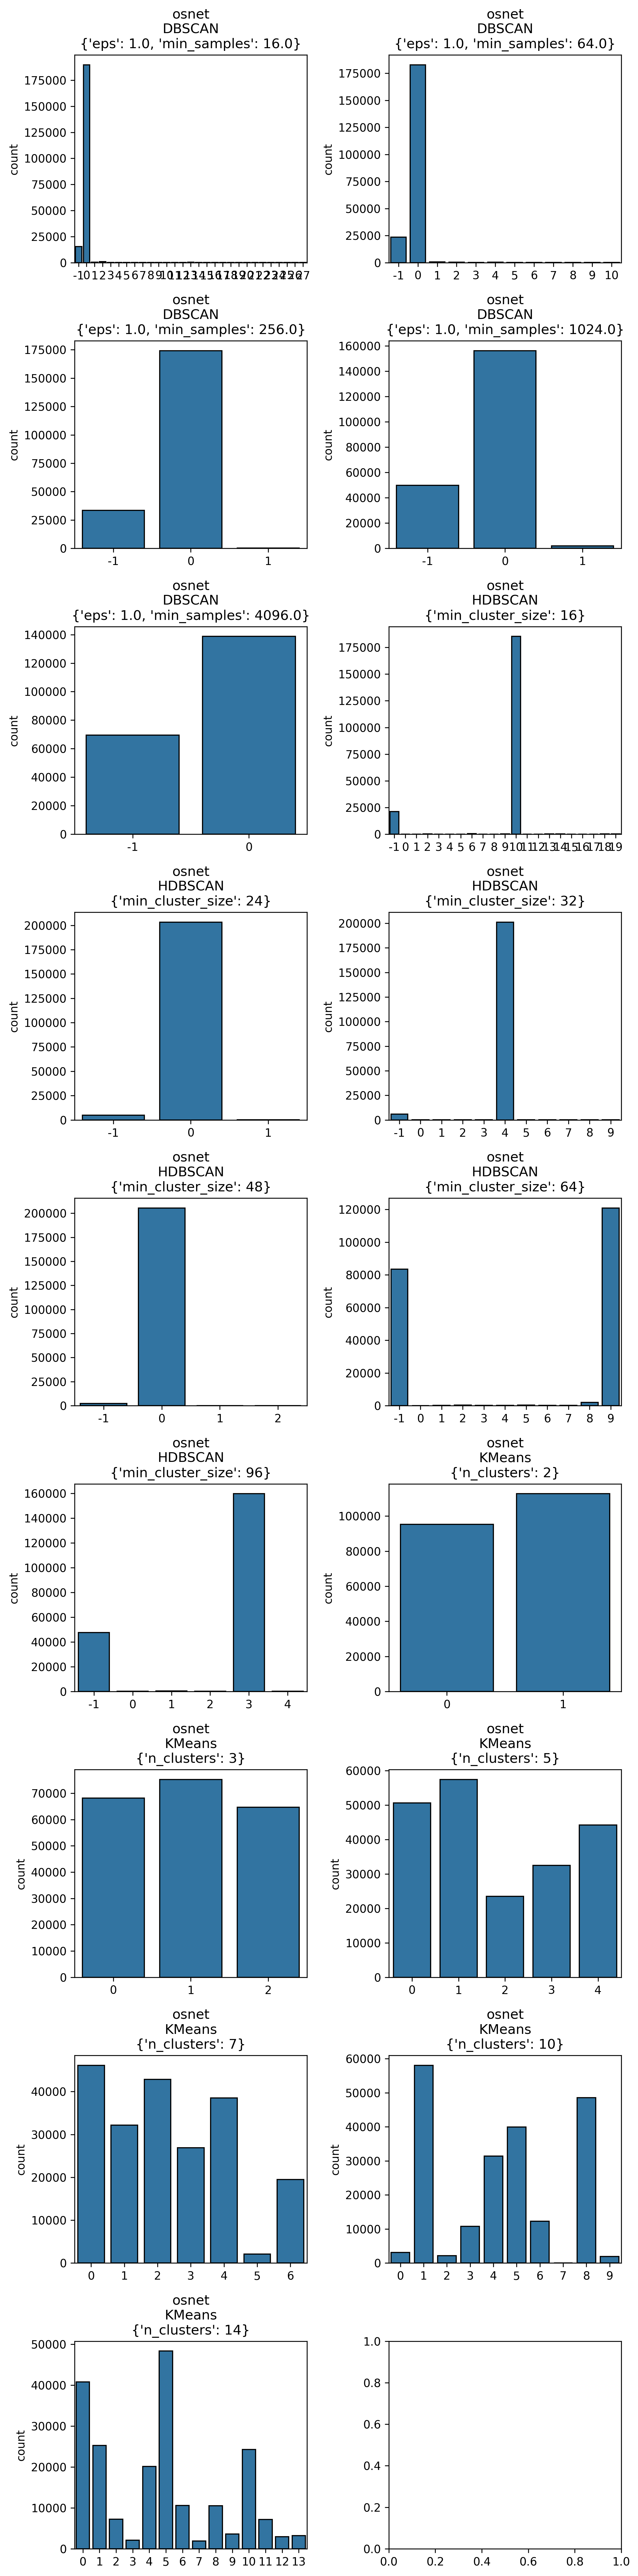

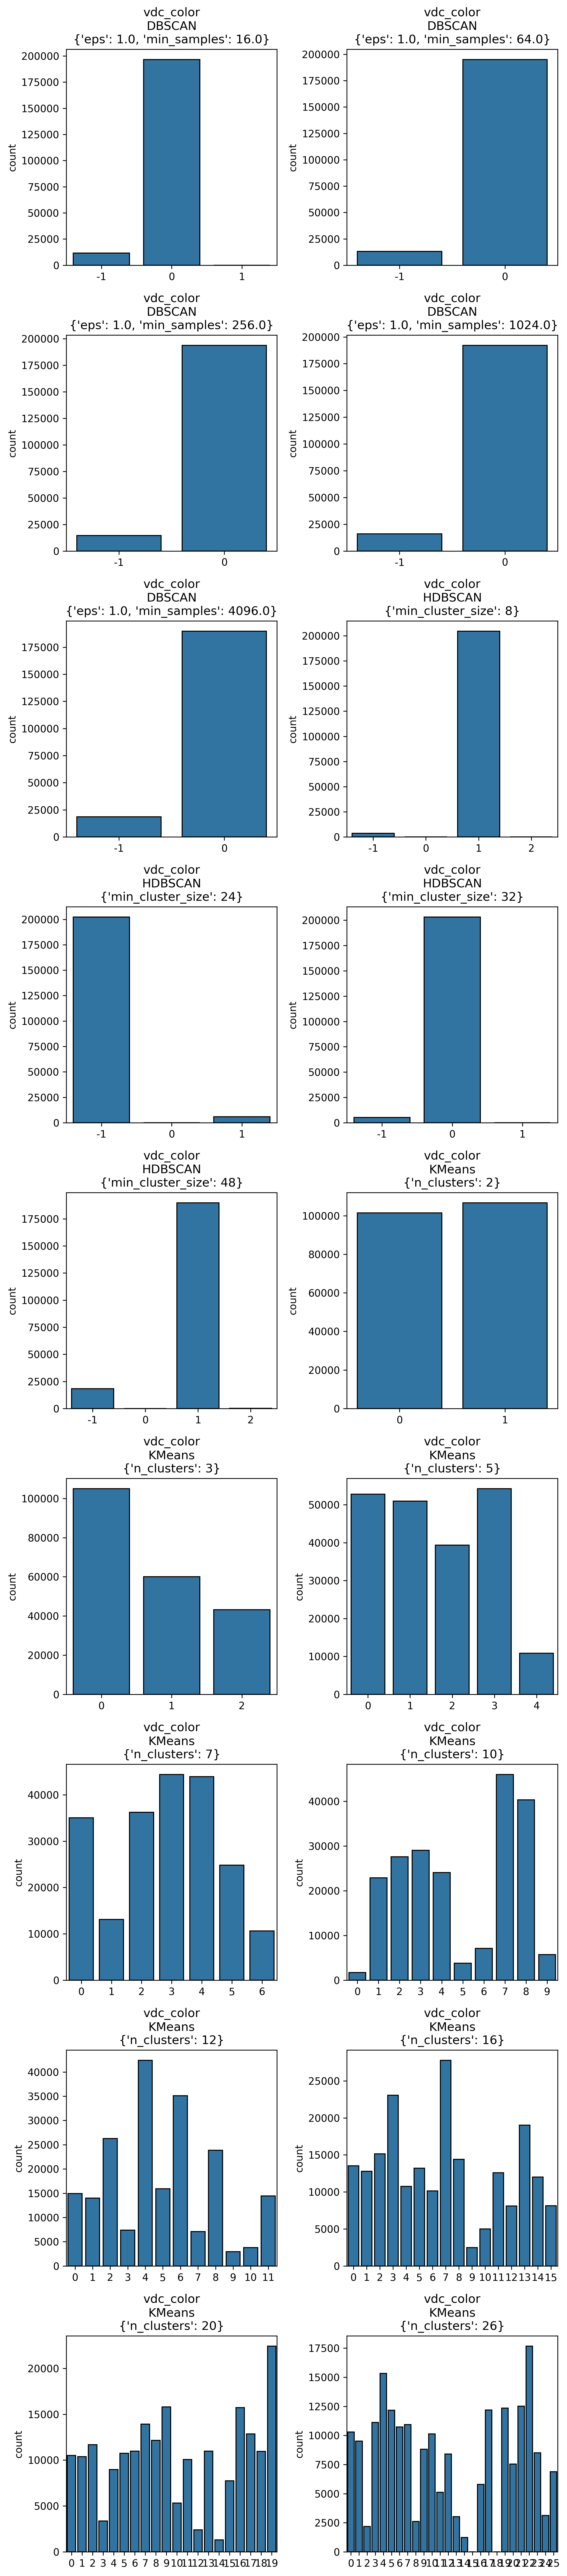

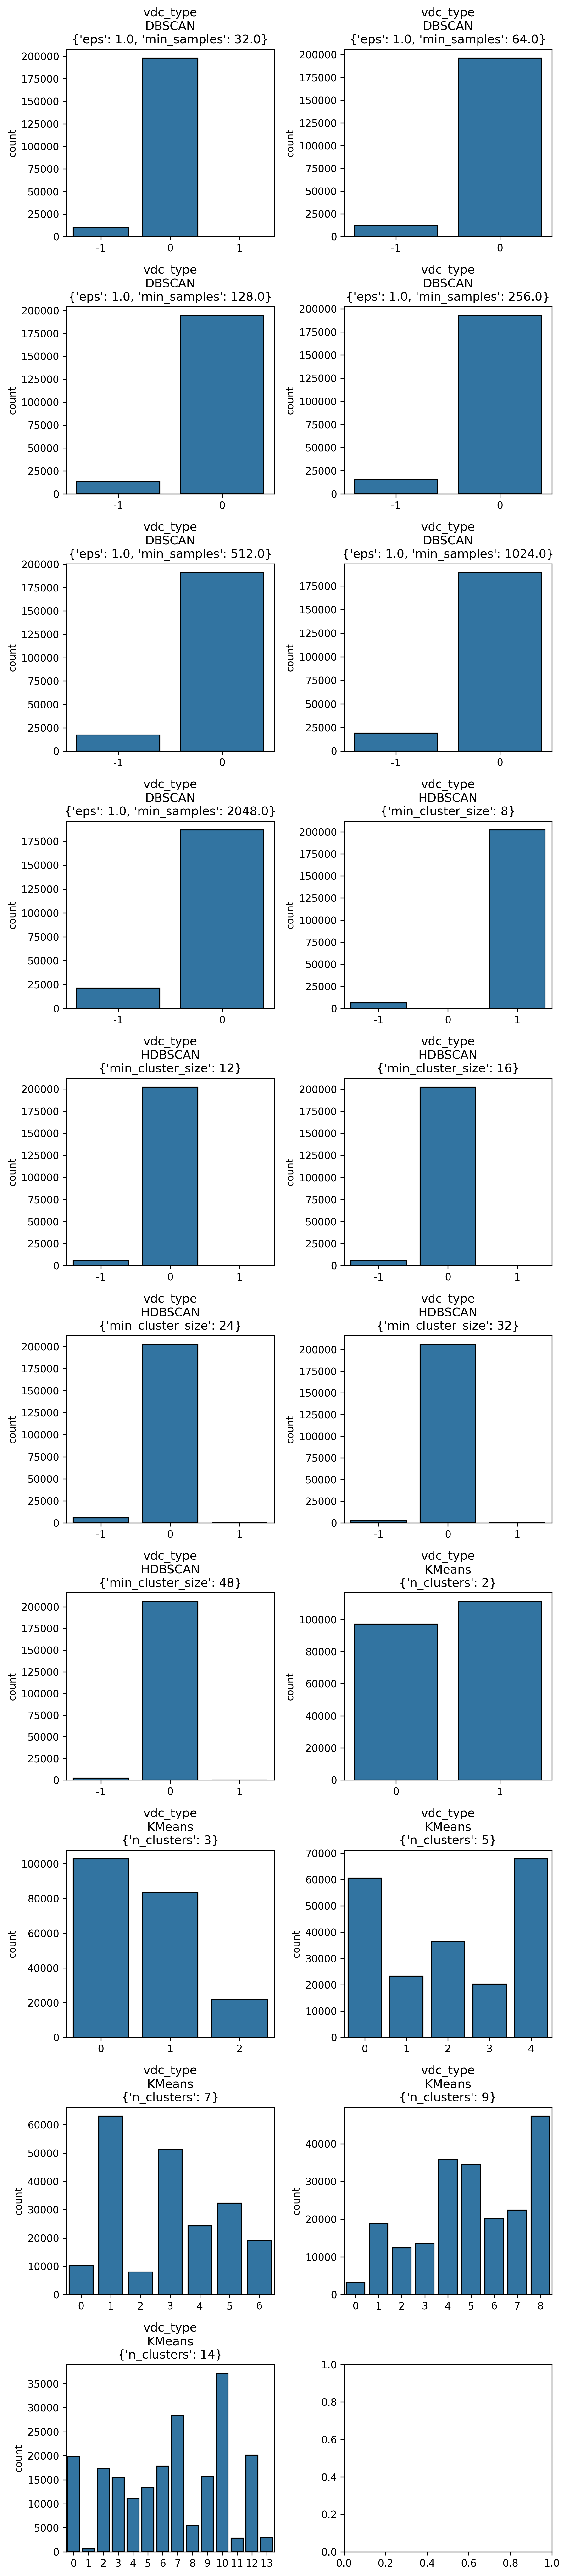

In [7]:
display_models(cluster_results_df)
countplot_clusters(cluster_results_df)

### ВЫВОДЫ:

Ниже приведён словарь параметров, отобранных для каждого дескриптора как по метрикам, так и по столбчатым диаграммам.

In [2]:
best_scaler = 'norm'

selected_params = {
    'efficientnet-b7': {
        KMeans: {'n_clusters': [6, 4, 8]},
        DBSCAN: {
            'eps': [2],
            'min_samples': [256],    
        },
    },
    
    'osnet': {
        KMeans: {'n_clusters': [2, 3, 5]},
        DBSCAN: {
            'eps': [1, 1],
            'min_samples': [4096, 1024],    
        },
        HDBSCAN: {
            'min_cluster_size': [96, 64, 24]
        }
    },
    
    'vdc_color': {
        KMeans: {'n_clusters': [2, 3, 5, 7, 16]},
        DBSCAN: {
            'eps': [1, 1, 1],
            'min_samples': [4096, 1024, 256],     
        },
        HDBSCAN: {
            'min_cluster_size': [48, 32, 8]
        }
    },
    
    'vdc_type':{
        KMeans: {'n_clusters': [2, 3, 5, 7, 9]},
        DBSCAN: {
            'eps': [1, 1, 1],
            'min_samples': [2048, 1024, 512],    
        },
        HDBSCAN: {
            'min_cluster_size': [12, 16, 24]
        }
    },
}

In [3]:
cluster_results = conduct_grid_search(
    selected_params,
    get_mesh=False,
    data_fraction=1.0,
    scaler=['norm'],
    delay=2., # Extra time to free GPU-memory
)

ДЕСКРИПТОР efficientnet-b7
Модель кластеризации: KMeans
Метод масштабирования: norm
{'n_clusters': 6} ...	DONE!
{'n_clusters': 4} ...	DONE!
{'n_clusters': 8} ...	DONE!

Модель кластеризации: DBSCAN
Метод масштабирования: norm
{'eps': 2, 'min_samples': 256} ...	DONE!


ДЕСКРИПТОР osnet
Модель кластеризации: KMeans
Метод масштабирования: norm
{'n_clusters': 2} ...	DONE!
{'n_clusters': 3} ...	DONE!
{'n_clusters': 5} ...	DONE!

Модель кластеризации: DBSCAN
Метод масштабирования: norm
{'eps': 1, 'min_samples': 4096} ...	DONE!
{'eps': 1, 'min_samples': 1024} ...	DONE!

Модель кластеризации: HDBSCAN
Метод масштабирования: norm
{'min_cluster_size': 96} ...	DONE!
{'min_cluster_size': 64} ...	DONE!
{'min_cluster_size': 24} ...	DONE!


ДЕСКРИПТОР vdc_color
Модель кластеризации: KMeans
Метод масштабирования: norm
{'n_clusters': 2} ...	DONE!
{'n_clusters': 3} ...	DONE!
{'n_clusters': 5} ...	DONE!
{'n_clusters': 7} ...	DONE!
{'n_clusters': 16} ...	DONE!

Модель кластеризации: DBSCAN
Метод масштабиро

ДЕСКРИПТОР: efficientnet-b7


cluster_class            cluster_class_params  n_clusters  \
2        KMeans               {'n_clusters': 8}           8   
0        KMeans               {'n_clusters': 6}           6   
1        KMeans               {'n_clusters': 4}           4   
3        DBSCAN  {'eps': 2, 'min_samples': 256}           2   

   calinski_harabasz_score  davies_bouldin_score  
2               870.855989              8.571862  
0               786.413955              9.152389  
1               657.252799              7.653223  
3               251.980365             10.569928

ДЕСКРИПТОР: osnet


cluster_class             cluster_class_params  n_clusters  \
4         KMeans                {'n_clusters': 2}           2   
5         KMeans                {'n_clusters': 3}           3   
6         KMeans                {'n_clusters': 5}           5   
9        HDBSCAN         {'min_cluster_size': 96}           9   
10       HDBSCAN         {'min_cluster_size': 64}          16   
11       HDBSCAN         {'min_cluster_size': 24}           5   
7         DBSCAN  {'eps': 1, 'min_samples': 4096}           2   
8         DBSCAN  {'eps': 1, 'min_samples': 1024}           2   

    calinski_harabasz_score  davies_bouldin_score  
4              18166.933969              4.636674  
5              12546.605370              4.261808  
6               9758.292374              4.866762  
9               1106.080032              3.436839  
10               864.263185              2.689393  
11               491.449272              3.831111  
7               6487.073754              7.100532  
8               4636.493398              7.354948

ДЕСКРИПТОР: vdc_color


cluster_class             cluster_class_params  n_clusters  \
12        KMeans                {'n_clusters': 2}           2   
13        KMeans                {'n_clusters': 3}           3   
14        KMeans                {'n_clusters': 5}           5   
15        KMeans                {'n_clusters': 7}           7   
16        KMeans               {'n_clusters': 16}          16   
20       HDBSCAN         {'min_cluster_size': 48}           3   
21       HDBSCAN         {'min_cluster_size': 32}           3   
22       HDBSCAN          {'min_cluster_size': 8}           4   
17        DBSCAN  {'eps': 1, 'min_samples': 4096}           2   
18        DBSCAN  {'eps': 1, 'min_samples': 1024}           2   
19        DBSCAN   {'eps': 1, 'min_samples': 256}           2   

    calinski_harabasz_score  davies_bouldin_score  
12             18384.374233              4.684859  
13             11343.436745              6.155341  
14              7572.719054              6.194406  
15              5941.492959              5.557457  
16              3692.911455              5.010960  
20               340.574372              5.012088  
21               340.574372              5.012088  
22               323.044286              4.111421  
17              1604.884073              7.600295  
18              1518.459370              7.466180  
19              1389.200383              7.435326

ДЕСКРИПТОР: vdc_type


cluster_class             cluster_class_params  n_clusters  \
23        KMeans                {'n_clusters': 2}           2   
24        KMeans                {'n_clusters': 3}           3   
25        KMeans                {'n_clusters': 5}           5   
26        KMeans                {'n_clusters': 7}           7   
27        KMeans                {'n_clusters': 9}           9   
33       HDBSCAN         {'min_cluster_size': 24}           3   
31       HDBSCAN         {'min_cluster_size': 12}           5   
32       HDBSCAN         {'min_cluster_size': 16}           5   
28        DBSCAN  {'eps': 1, 'min_samples': 2048}           2   
29        DBSCAN  {'eps': 1, 'min_samples': 1024}           2   
30        DBSCAN   {'eps': 1, 'min_samples': 512}           2   

    calinski_harabasz_score  davies_bouldin_score  
23              9598.545856              6.437823  
24              6377.624415              6.833088  
25              4358.856382              6.556215  
26              3857.950862              5.914460  
27              3423.776084              5.438693  
33               580.334692              6.611426  
31               362.364601              5.636249  
32               361.092797              5.555438  
28              1344.643930              9.455507  
29              1305.850813              9.170703  
30              1259.656282              8.909853

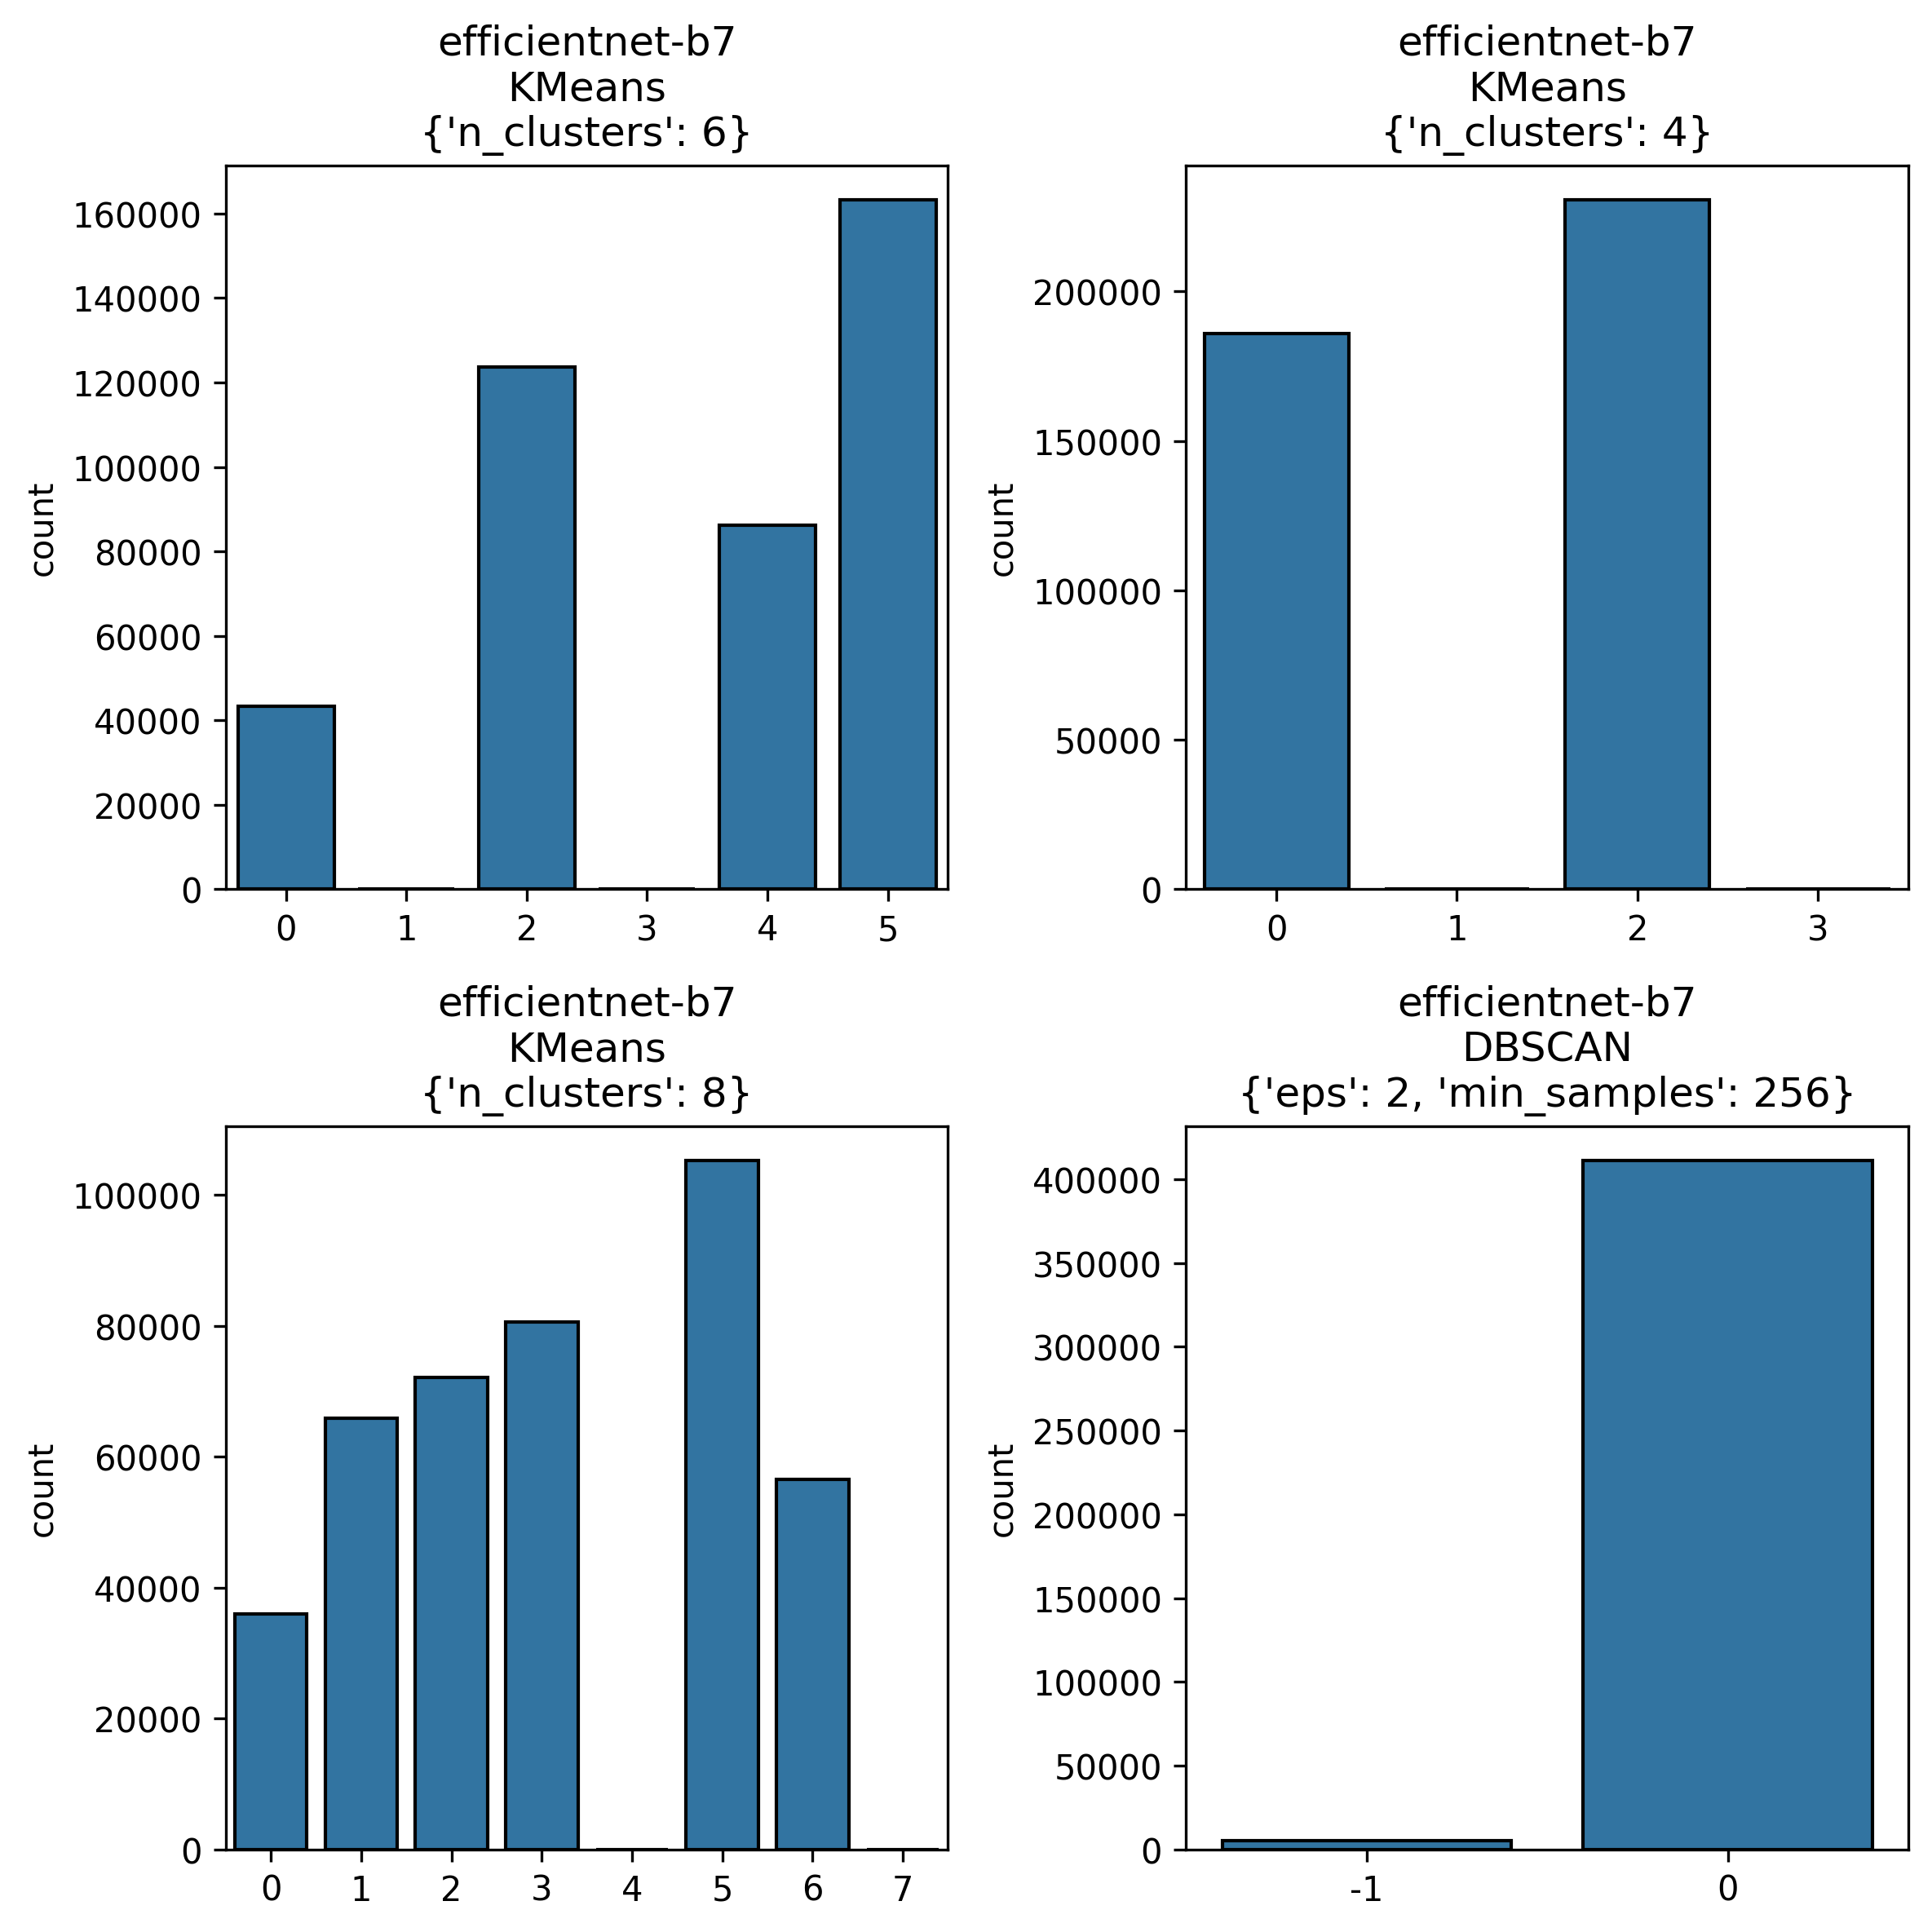

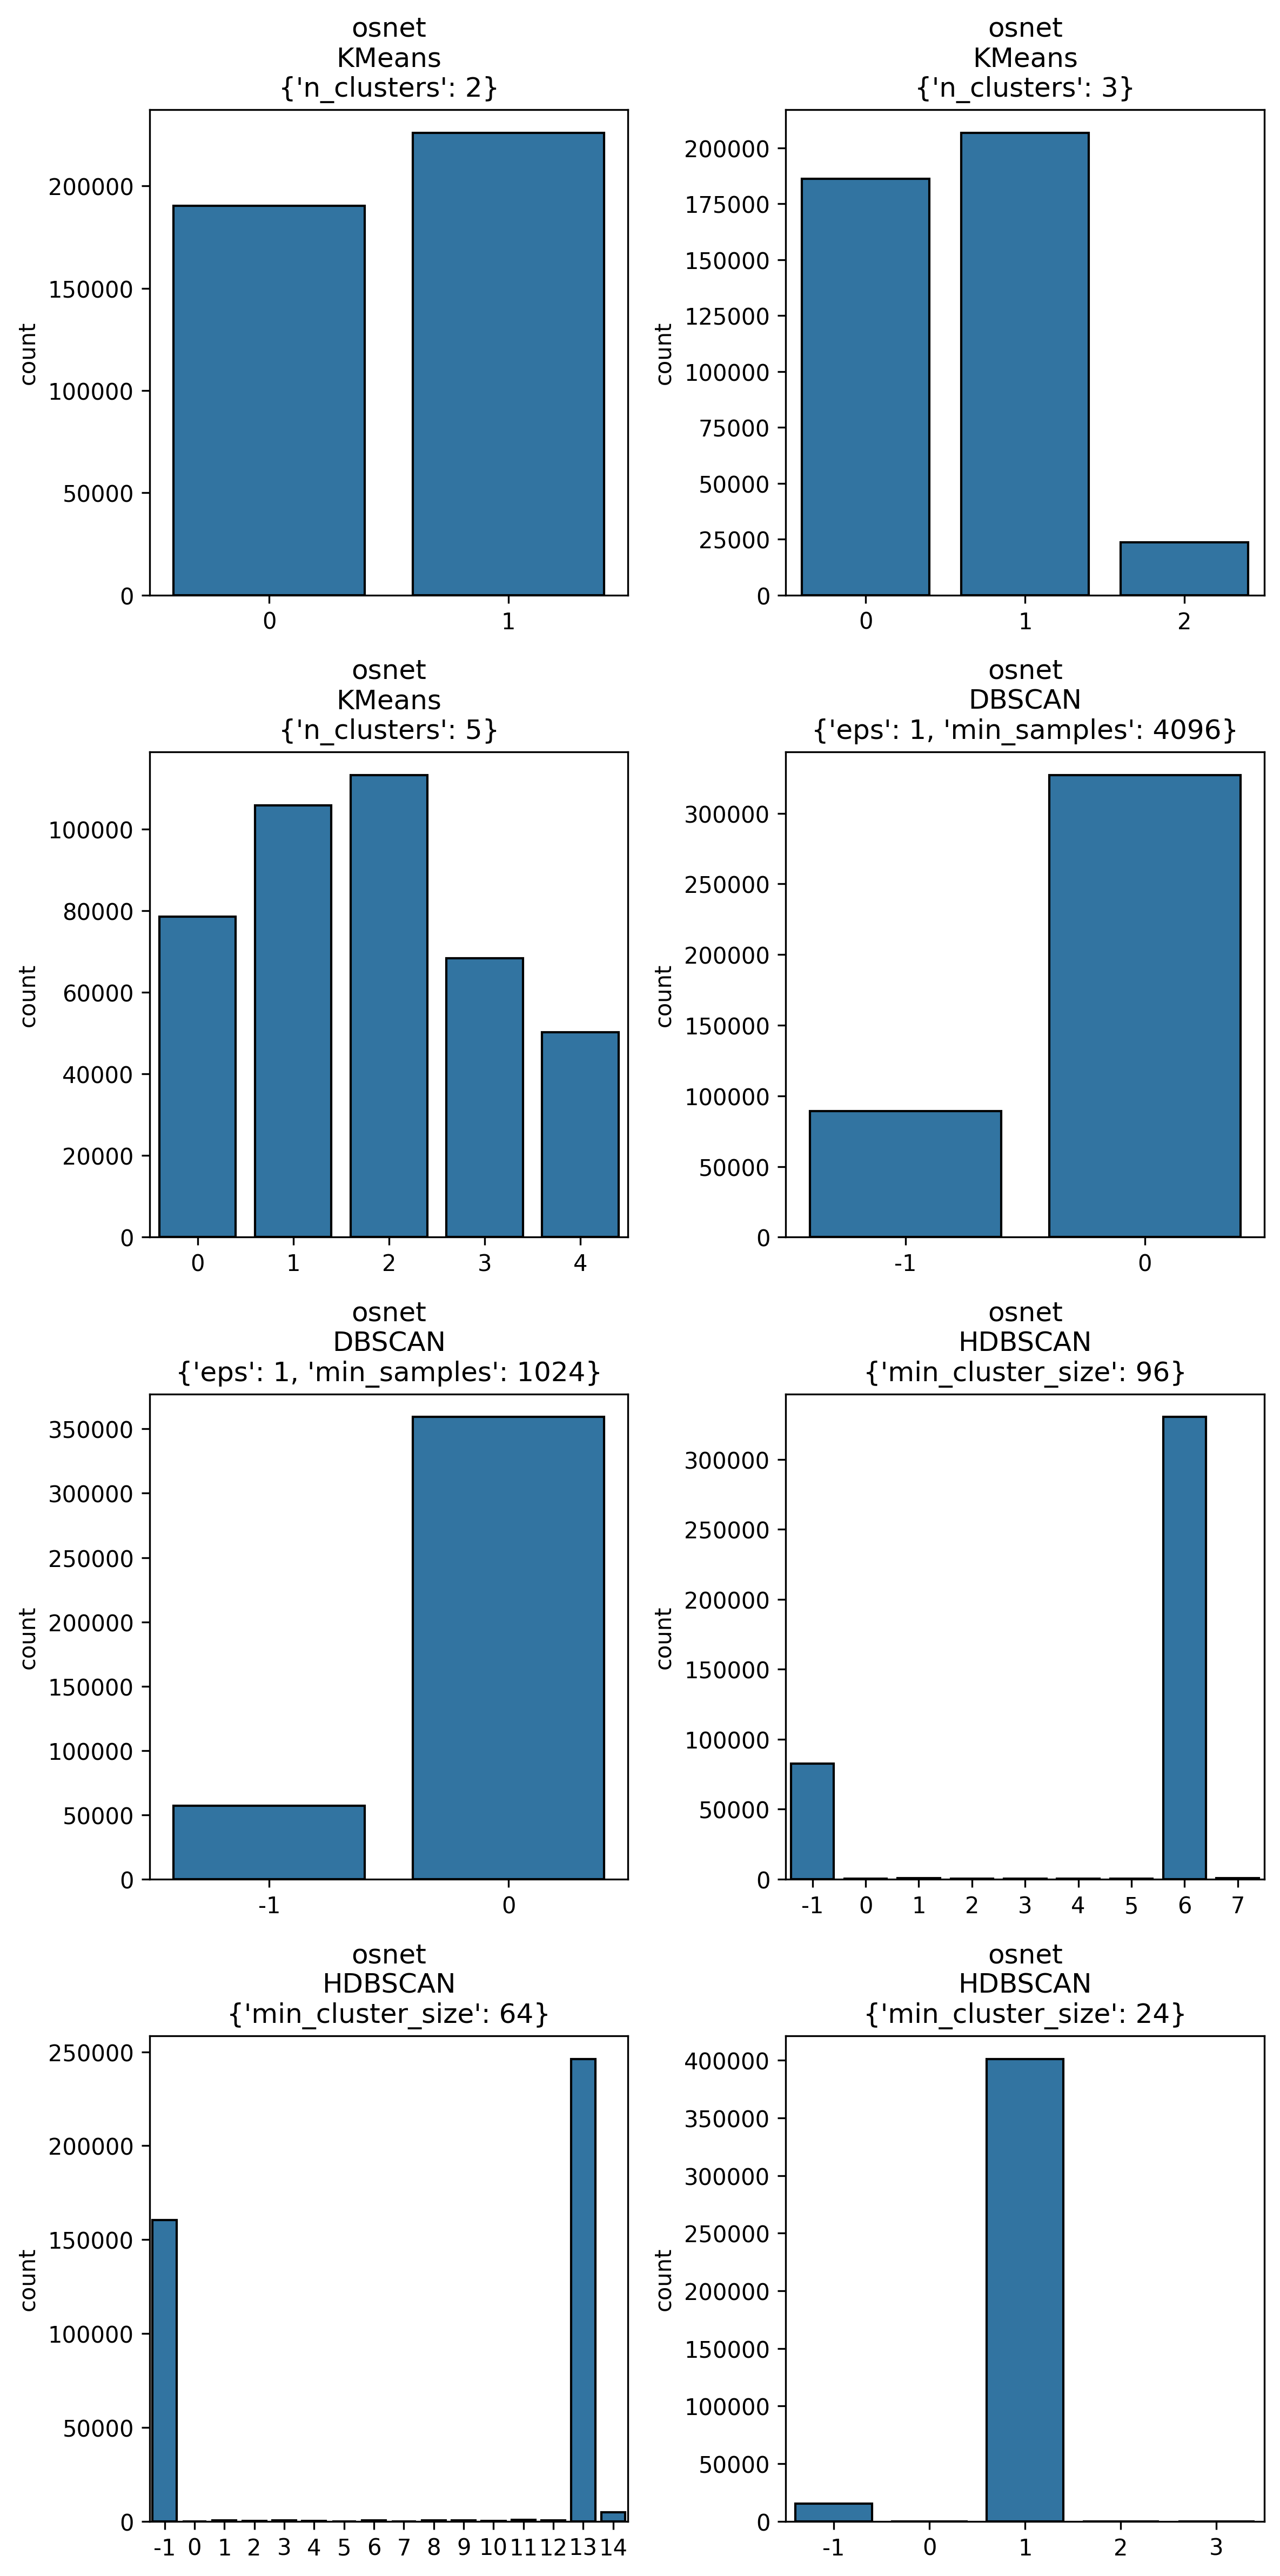

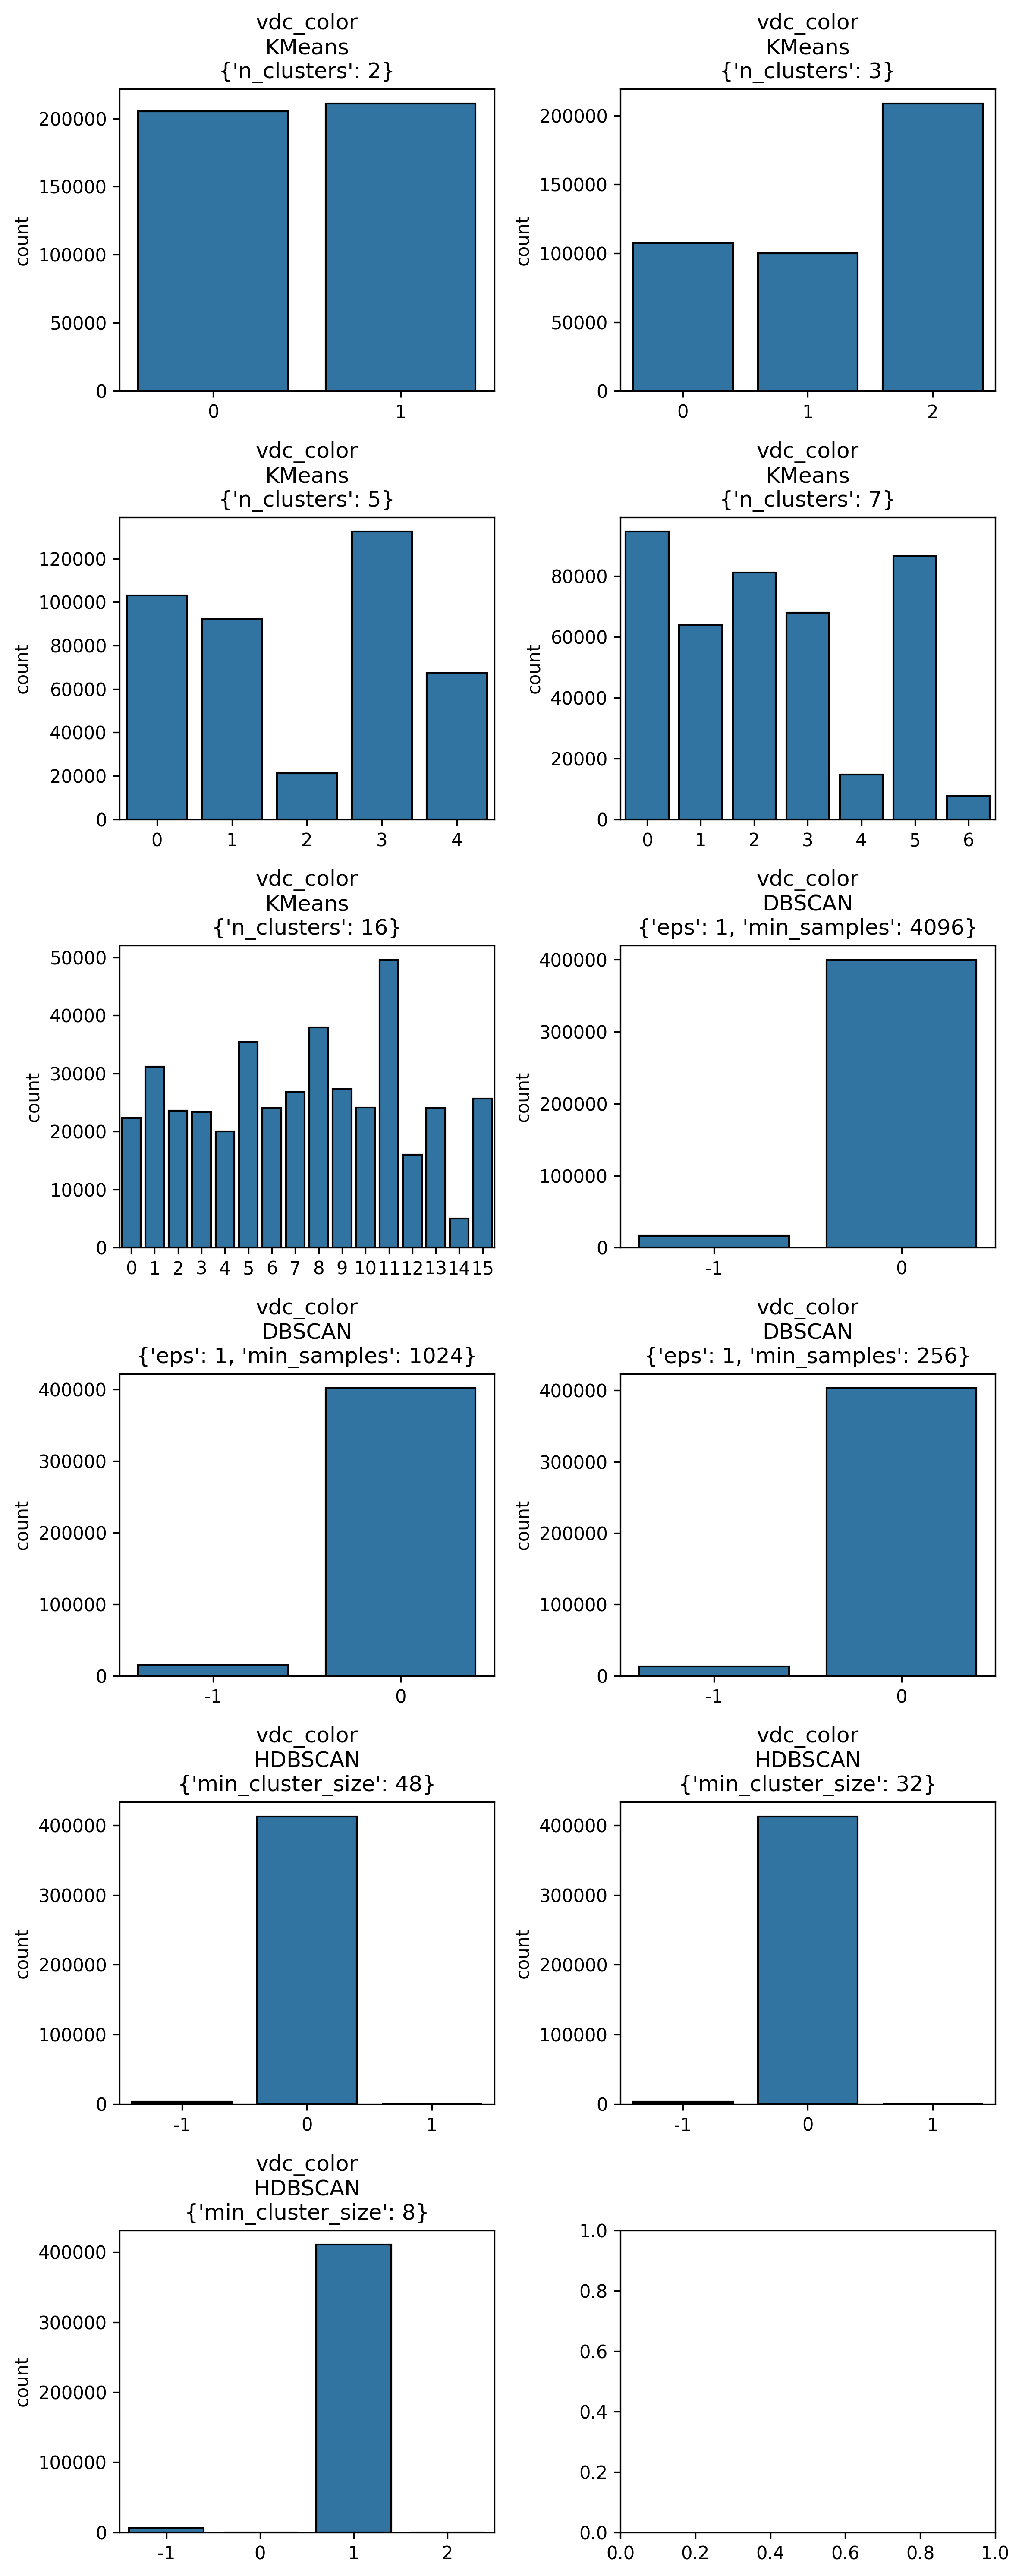

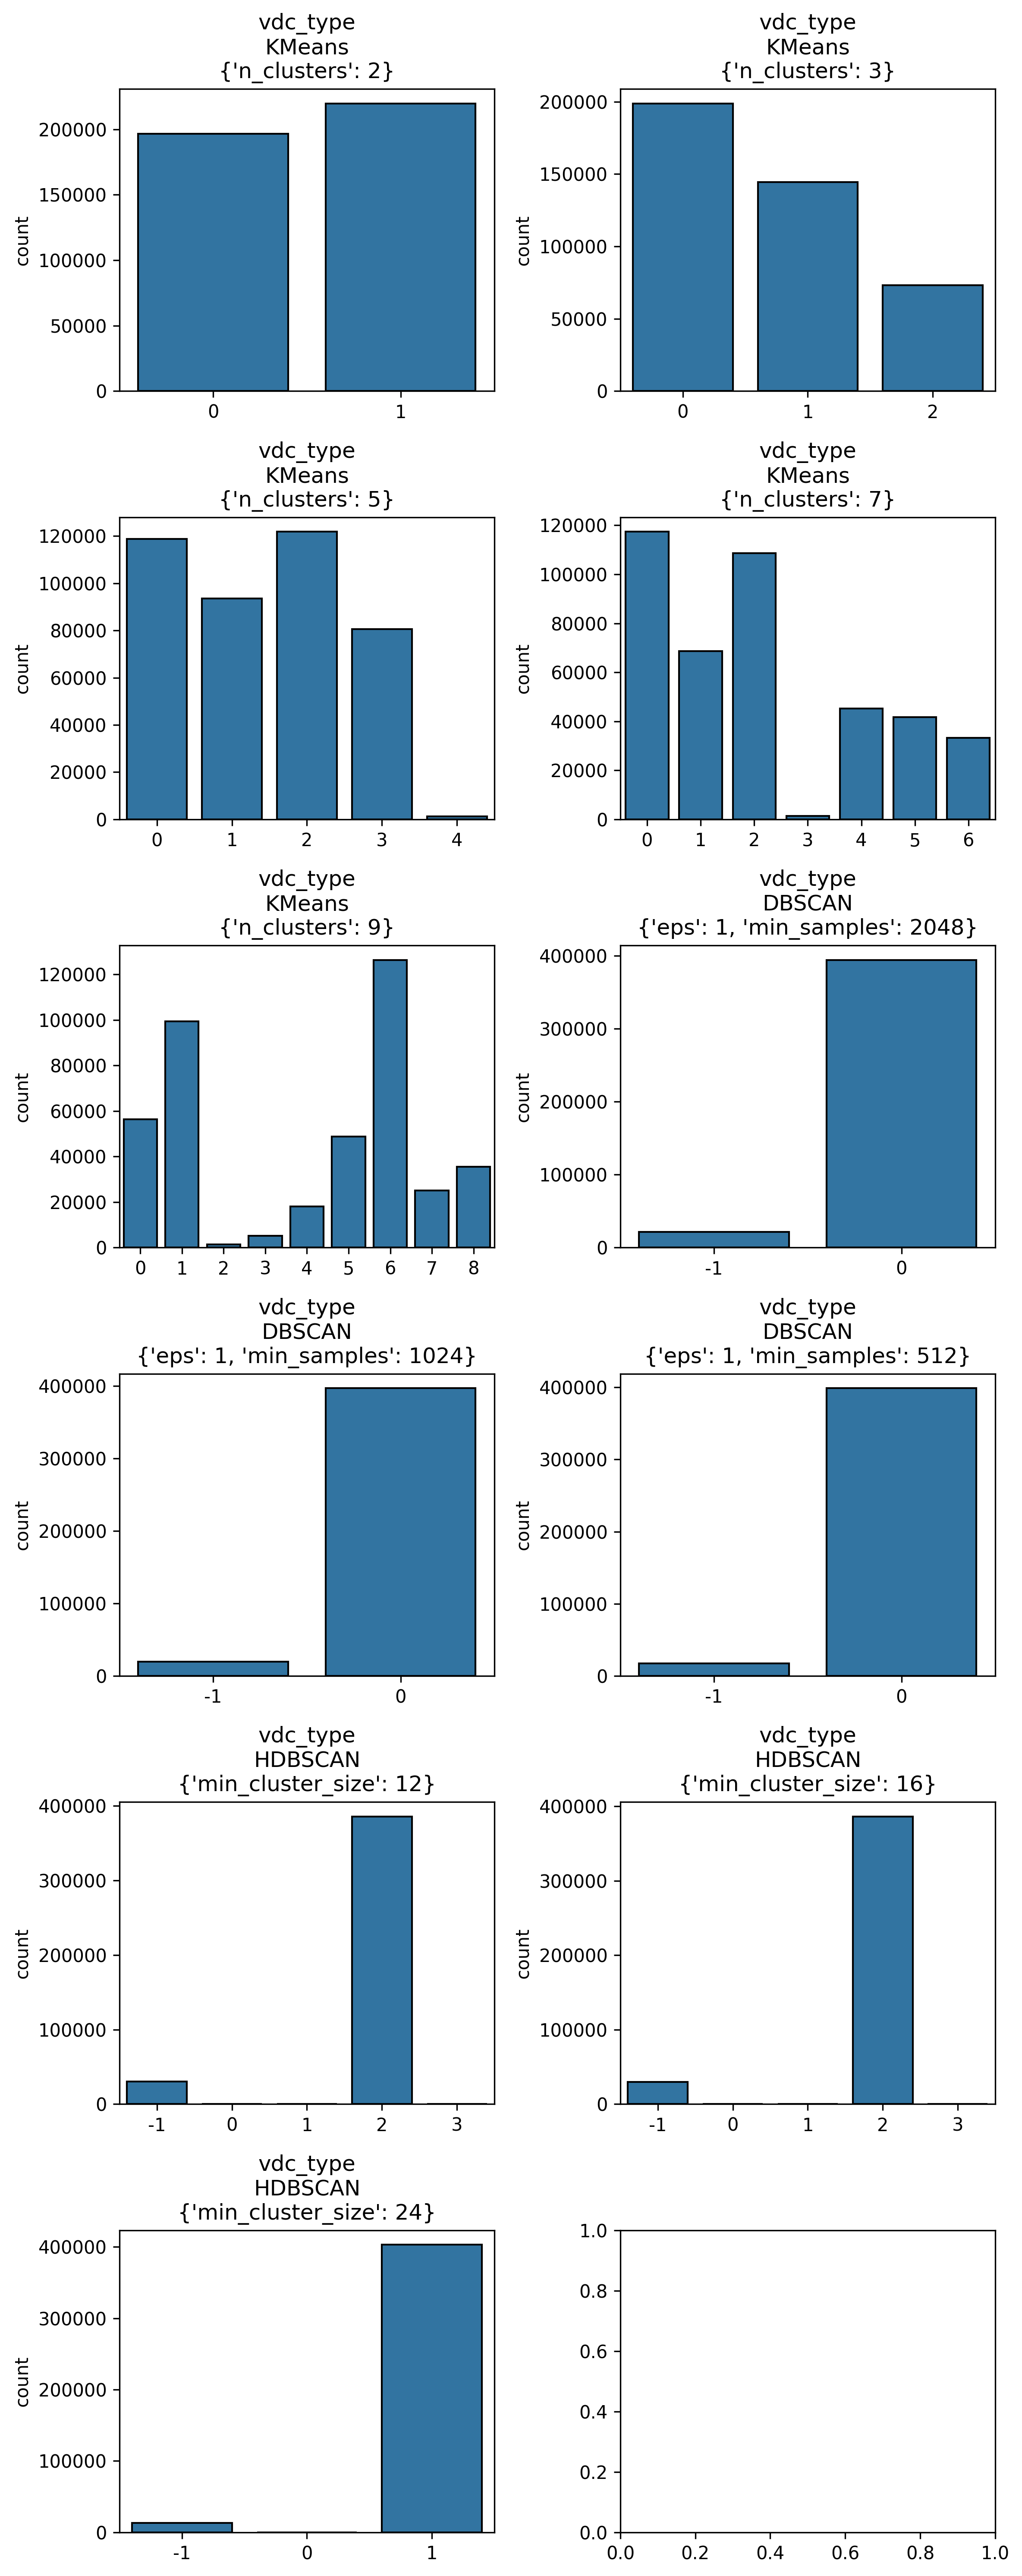

In [4]:
cluster_results_df = pd.DataFrame(cluster_results)
cluster_results_df.to_csv('results/prefinal_scores.csv', index=False)

display_models(cluster_results_df)
countplot_clusters(cluster_results_df)

### 3.2. Интерпретация кластеров

#### 3.2.1 Визуализация кластеров

Визуализируйте результаты кластеризации в двух- или трёхмерном пространстве, предварительно понизив размерность дескрипторов изображений до соответствующих размерностей с помощью метода t-SNE. 

По результатам визуализации кластеров сделайте предположение о качестве полученной кластеризации.

In [10]:
data_keeper = DataKeeper()
data_keeper.load_descriptor_PCA('osnet')
data_keeper.get_norm_scaled_descriptor()
umap = UMAP(n_components=3)
X = umap.fit_transform(data_keeper.descriptors_scaled['norm'])

In [6]:
cluster_results_df.head(16)

descriptor scaler cluster_class             cluster_class_params  \
0   efficientnet-b7   norm        KMeans                {'n_clusters': 6}   
1   efficientnet-b7   norm        KMeans                {'n_clusters': 4}   
2   efficientnet-b7   norm        KMeans                {'n_clusters': 8}   
3   efficientnet-b7   norm        DBSCAN   {'eps': 2, 'min_samples': 256}   
4             osnet   norm        KMeans                {'n_clusters': 2}   
5             osnet   norm        KMeans                {'n_clusters': 3}   
6             osnet   norm        KMeans                {'n_clusters': 5}   
7             osnet   norm        DBSCAN  {'eps': 1, 'min_samples': 4096}   
8             osnet   norm        DBSCAN  {'eps': 1, 'min_samples': 1024}   
9             osnet   norm       HDBSCAN         {'min_cluster_size': 96}   
10            osnet   norm       HDBSCAN         {'min_cluster_size': 64}   
11            osnet   norm       HDBSCAN         {'min_cluster_size': 24}   
12        vdc_color   norm        KMeans                {'n_clusters': 2}   
13        vdc_color   norm        KMeans                {'n_clusters': 3}   
14        vdc_color   norm        KMeans                {'n_clusters': 5}   
15        vdc_color   norm        KMeans                {'n_clusters': 7}   

                                               labels  n_clusters  \
0   [5, 4, 0, 4, 5, 2, 2, 0, 5, 4, 2, 5, 2, 2, 2, ...           6   
1   [0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, ...           4   
2   [5, 5, 6, 0, 1, 2, 1, 1, 3, 6, 2, 5, 2, 5, 2, ...           8   
3   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           2   
4   [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, ...           2   
5   [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, ...           3   
6   [1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 1, 3, 2, 2, 2, ...           5   
7   [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0,...           2   
8   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           2   
9   [6, 6, 6, 6, 6, 6, 6, 6, -1, 6, 6, -1, 6, 6, 6...           9   
10  [13, 13, 13, 13, -1, 13, 13, 13, -1, 13, 13, -...          16   
11  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...           5   
12  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...           2   
13  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, ...           3   
14  [3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 4, 1, 1, 1, ...           5   
15  [1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 3, 5, 5, 5, ...           7   

    calinski_harabasz_score  davies_bouldin_score  
0                786.413955              9.152389  
1                657.252799              7.653223  
2                870.855989              8.571862  
3                251.980365             10.569928  
4              18166.933969              4.636674  
5              12546.605370              4.261808  
6               9758.292374              4.866762  
7               6487.073754              7.100532  
8               4636.493398              7.354948  
9               1106.080032              3.436839  
10               864.263185              2.689393  
11               491.449272              3.831111  
12             18384.374233              4.684859  
13             11343.436745              6.155341  
14              7572.719054              6.194406  
15              5941.492959              5.557457

In [13]:
mask = ((X>-10) & (X<10)).all(axis=1)
masked_X = X[mask]

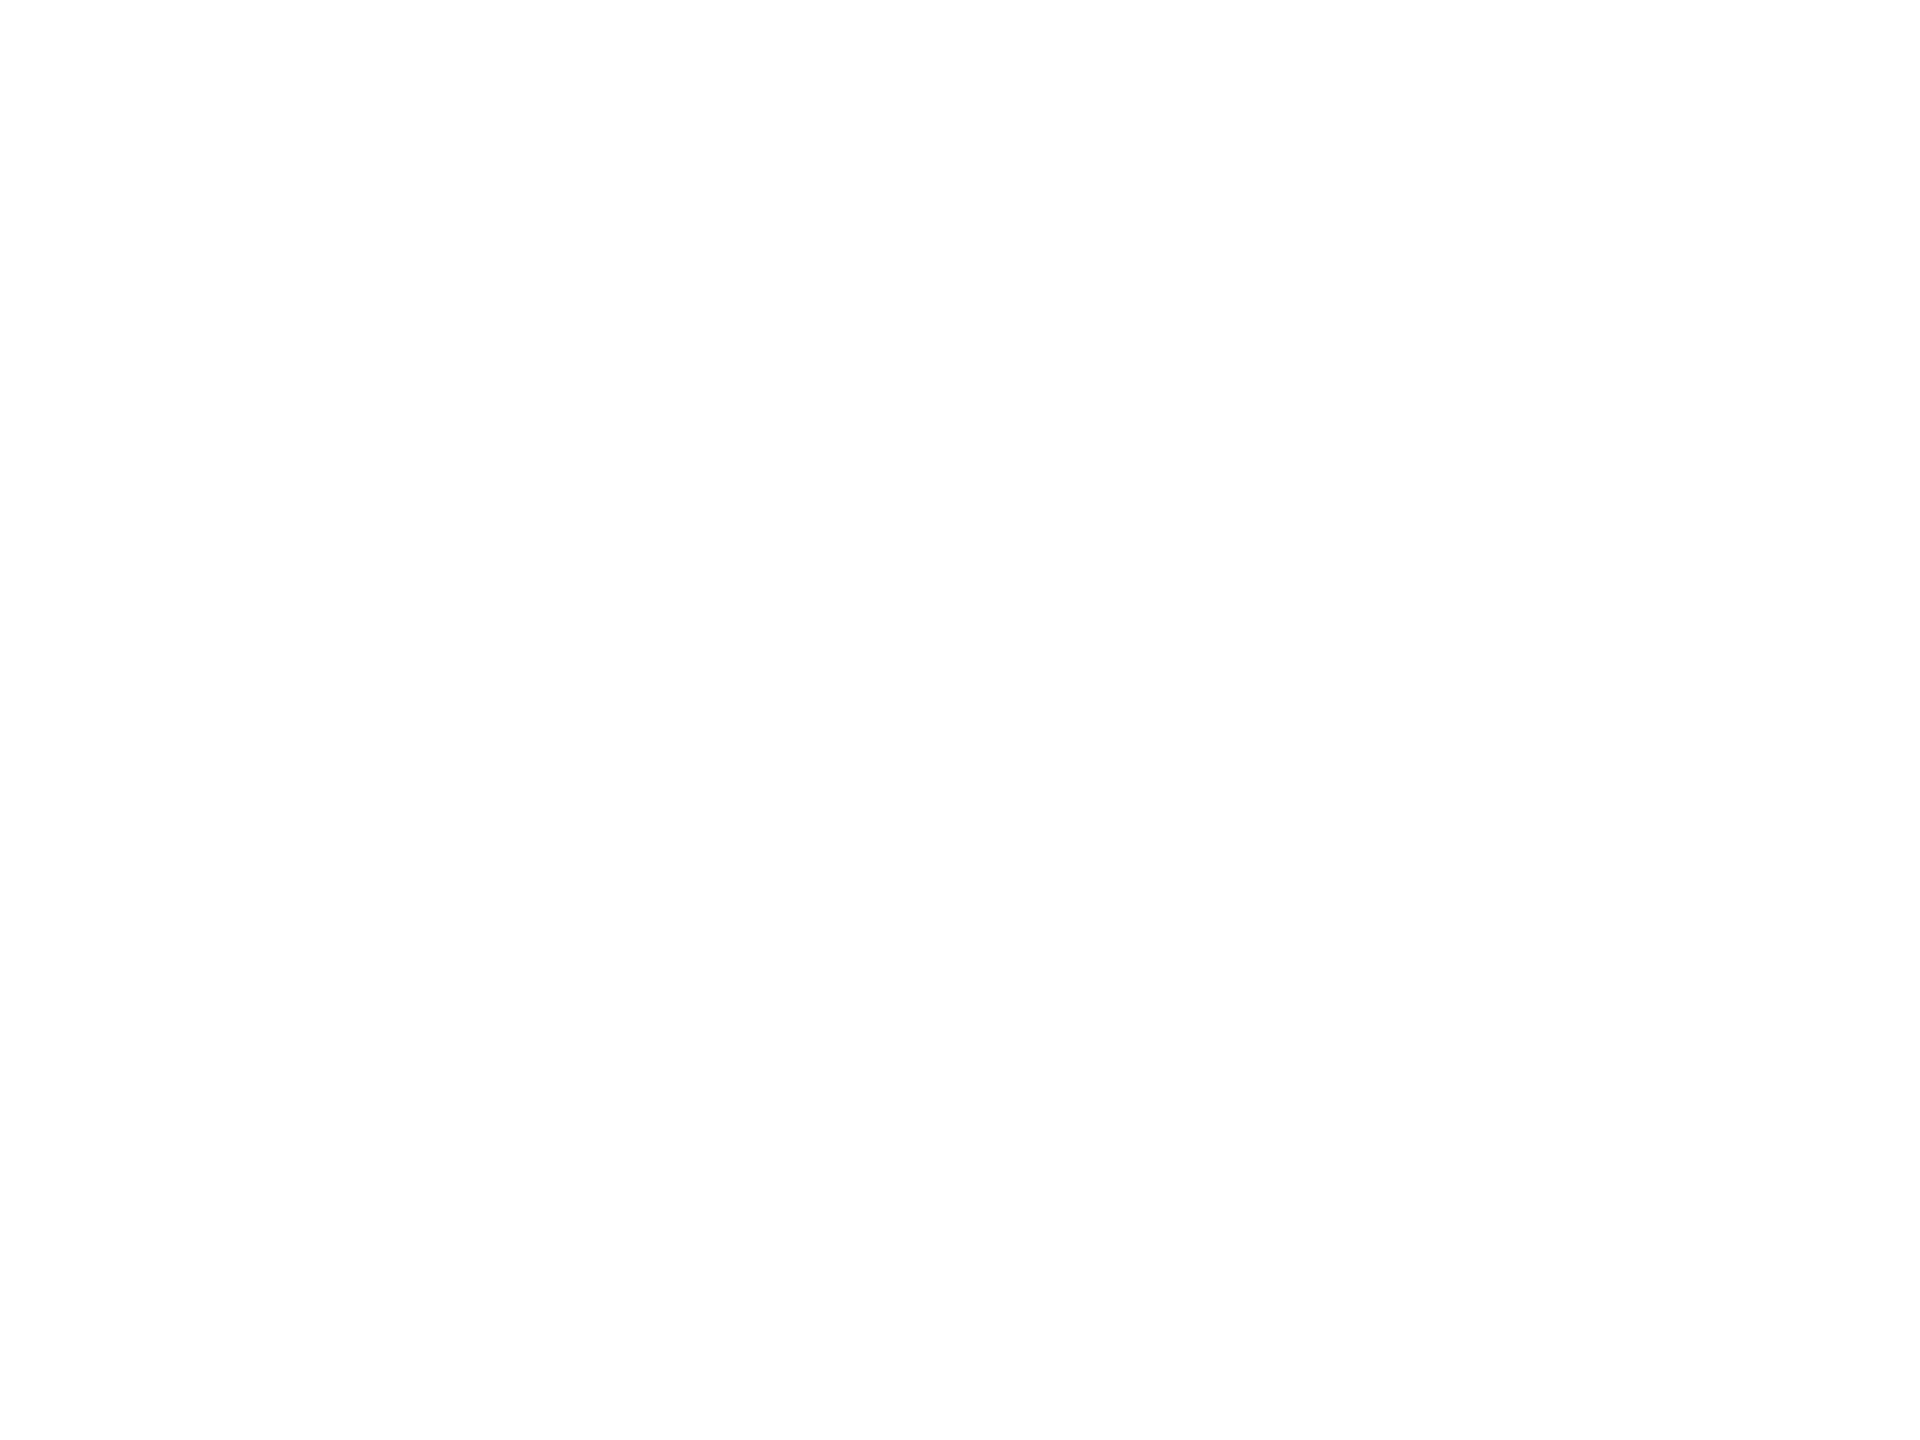

In [27]:
%matplotlib widget
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(
    xs=masked_X[:, 0].get(),
    ys=masked_X[:, 1].get(),
    zs=masked_X[:, 2].get(),
    c=cluster_results_df.iloc[4]['labels'][mask.get()]
)
plt.show()

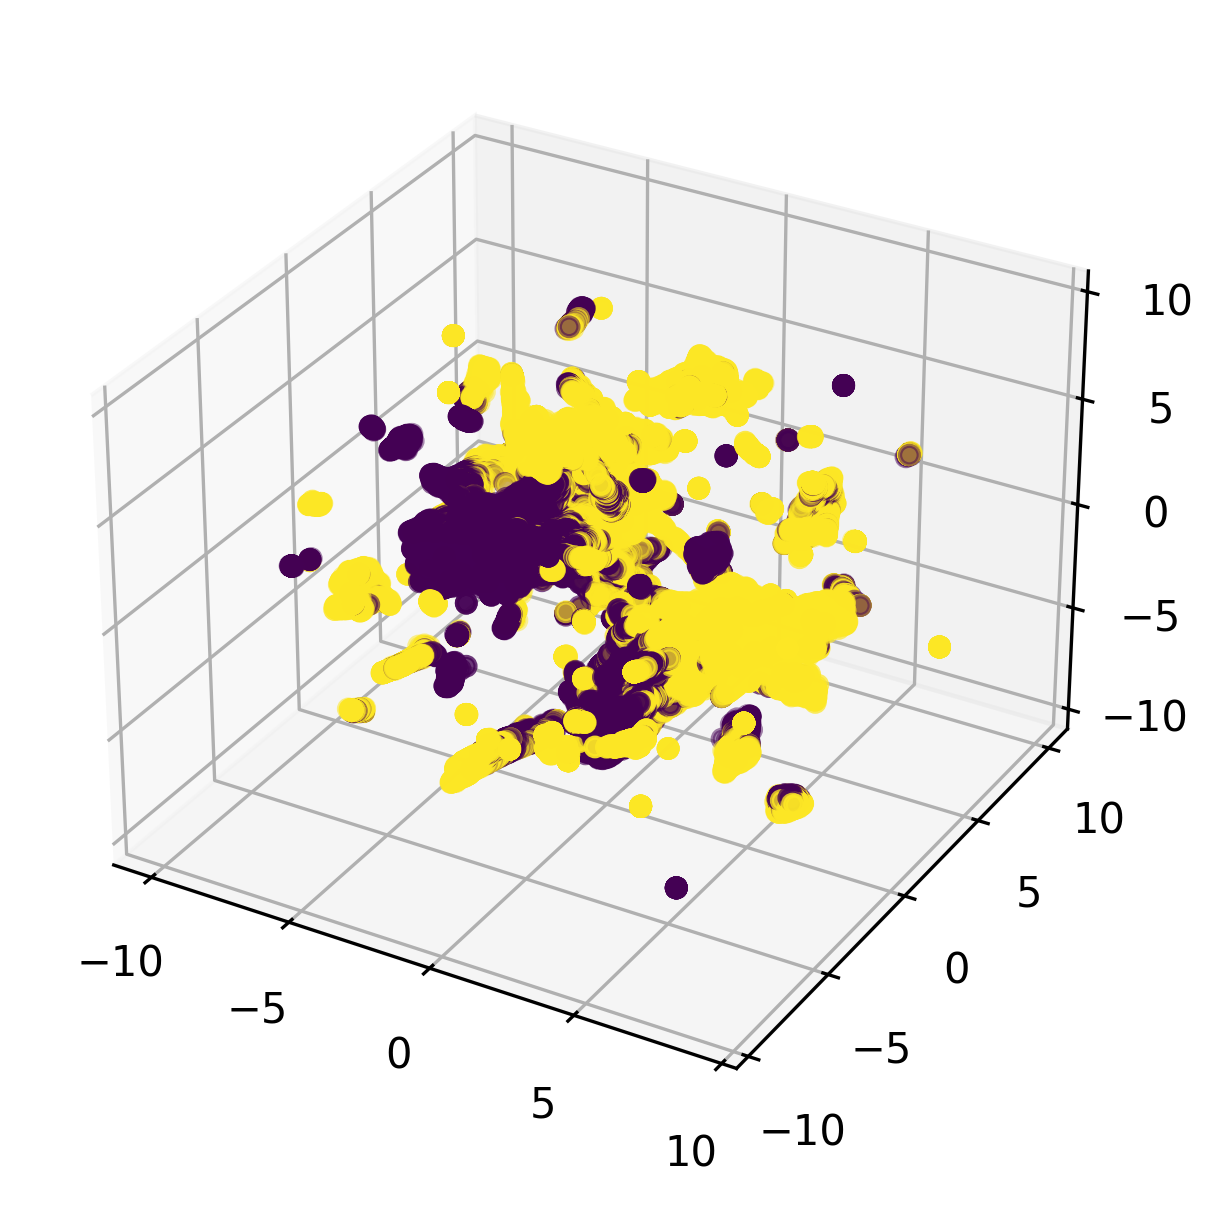

In [19]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# ax3d = Axes3D(fig)
ax.scatter3D(
    xs=masked_X[:, 0].get(),
    ys=masked_X[:, 1].get(),
    zs=masked_X[:, 2].get(),
    c=cluster_results_df.iloc[4]['labels'][mask.get()]
)
plt.show()

<Axes: >

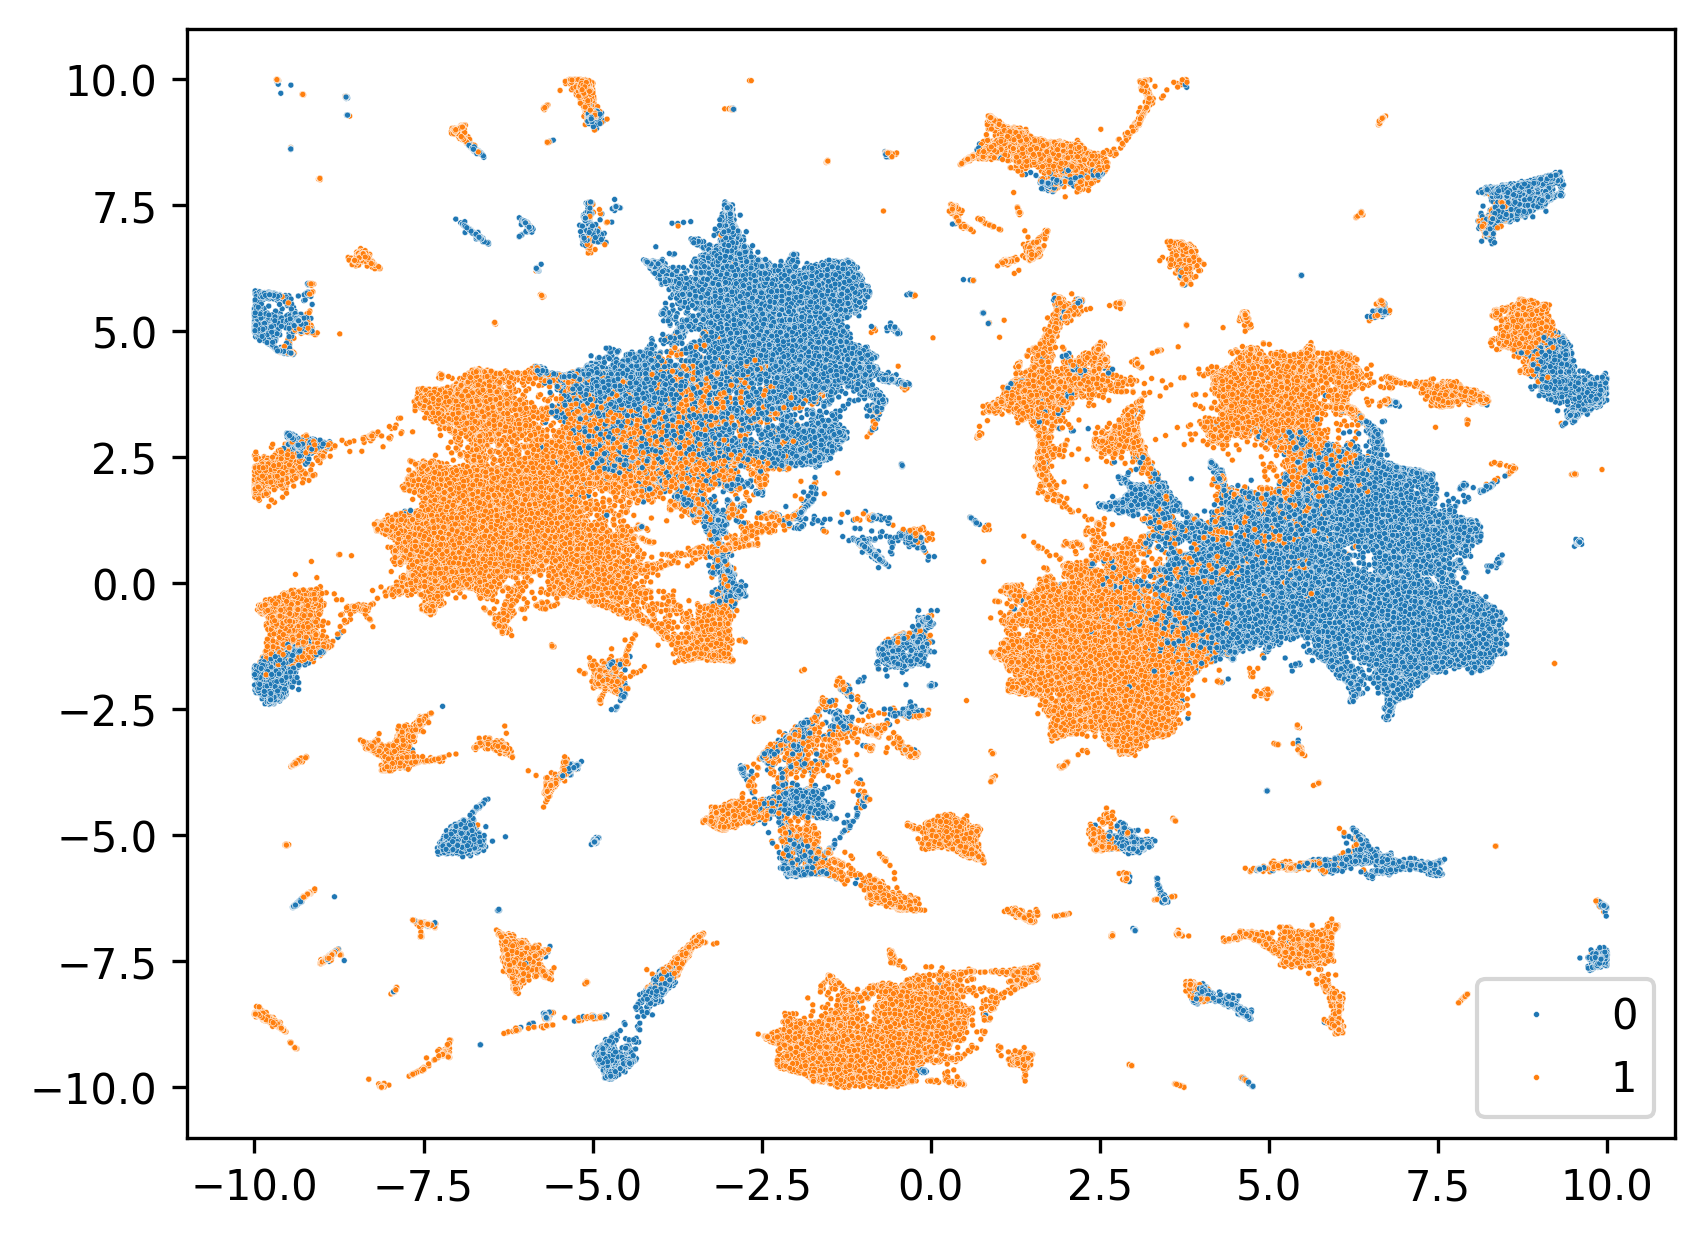

In [9]:
sns.scatterplot(
    x = masked_X[:, 0].get(),
    y = masked_X[:, 1].get(),
    hue=cluster_results_df.iloc[4]['labels'][mask.get()],
    s=2,
)

#### 3.2.2. Визуализация изображений в кластере


Визуализируйте несколько изображений из каждого кластера, чтобы проинтерпретировать результаты.

**Как визуализировать изображения, соответствующие определённому кластеру?**

Мы не рассматривали работу с изображениями как отдельную тему, однако не волнуйтесь — в этом нет ничего страшного.

В стандартных библиотеках для визуализации, которые мы изучали ранее, есть встроенный функционал для чтения и визуализации изображений. Например, в библиотеке matplotlib есть функция `plt.imread()`, которая позволяет читать изображение по переданному пути. Она возвращает numpy-массив размерности (h, w, c), где:

* h — высота изображения, 
* w — его ширина,
* c — количество каналов.

Так как все изображения в нашем датасете цветные, каналов (c) три:

* R — матрица интенсивности пикселей красного цвета,
* G — матрица интенсивности пикселей зелёного цвета,
* B — матрица интенсивности пикселей синего цвета.

Например, вот так можно прочитать изображение 000001.jpg:

```python
img = plt.imread('raw_data/veriwild/1/00001/000001.jpg')
print(img.shape)
## (557, 756, 3)
```

То есть изображение состоит из трёх матриц (R, G и B) с размерностью 557 строк на 756 столбцов. Элементами каждой из матриц являются интенсивности пикселей (от 0 до 255) соответствующего цвета.

Что касается вывода изображений на экран, в библиотеке matplotlib есть встроенная функция `plt.imshow()`, которая позволяет вывести переданное ей в аргументы изображение:

```python
fig = plt.figure(figsize=(5, 5))
plt.imshow(img);
```

Функцию `imshow()` можно вызывать и от имени координатных плоскостей при использовании `subplots` из библиотеки `matplotlib`:

```python
img1 = plt.imread('raw_data/veriwild/1/00001/000001.jpg')
img2 = plt.imread('raw_data/veriwild/1/00001/000002.jpg')
fig, axes = plt.subplots(1, 2, figsize=(5, 5))
axes[0].imshow(img1);
axes[1].imshow(img2);
```

После кластеризации для интерпретации результатов вам понадобится визуализировать несколько изображений из каждого кластера. Для этого мы подготовили функцию `plot_sample_cluster_images()`.

In [ ]:
def plot_samples_images(data, cluster_label, nrows=3, ncols=3, figsize=(12, 5)):
    """Функция для визуализации нескольких случайных изображений из кластера cluster_label.
    Пути до изображений и метки кластеров должны быть представлены в виде DataFrame со столбцами "paths" и "cluster".


    Args:
        data (DataFrame): таблица с разметкой изображений и соответствующих им кластеров.
        cluster_label (int): номер кластера изображений.
        nrows (int, optional): количество изображений по строкам таблицы (по умолчанию 3).
        ncols (int, optional): количество изображений по столбцам (по умолчанию 3).
        figsize (tuple, optional): размер фигуры (по умолчанию (12, 5)).
    """
    # Фильтруем данные по номеру кластера
    samples_indexes = np.array(data[data['cluster'] == cluster_label].index)
    # Перемешиваем результаты
    np.random.shuffle(samples_indexes)
    # Составляем пути до изображений
    paths = data.loc[samples_indexes, 'paths']
   
    # Создаём фигуру и набор координатных плоскостей
    fig, axes = plt.subplots(nrows,ncols)
    # Устанавливаем размер фигуры
    fig.set_size_inches(*figsize)
    # Устанавливаем название графика
    fig.suptitle(f"Images from cluster {cluster_label}", fontsize=16)
    # Создаём цикл по строкам в таблице с координатными плоскостями
    for i in range(nrows):
        # Создаём цикл по столбцам в таблице с координатными плоскостями
        for j in range(ncols):
            # Определяем индекс пути до изображения
            path_idx = i * ncols + j
            if path_idx >= len(paths):
                break
            # Извлекаем путь до изображения
            path = paths.iloc[path_idx]
            # Читаем изображение
            img = plt.imread(path)
            # Отображаем его на соответствующей координатной плоскости
            axes[i,j].imshow(img)
            # Убираем пометки координатных осей
            axes[i,j].axis('off')


Например, вы произвели кластеризацию и записали пути до изображений в виде столбца "paths" и метки кластеров в виде столбца "cluster" в некоторый DataFrame с именем data. Тогда, чтобы визуализировать несколько случайных изображений из кластера 0, вам нужно вызвать функцию `plot_sample_cluster_images()` следующим образом:

```python
plot_samples_images(data=data, cluster_label=0)
```

### 3.3. Поиск выбросов

С помощью известных вам методов поиска выбросов (например, DBSCAN) попытайтесь найти выбросы среди изображений, используя все варианты дескрипторов. Подберите параметры алгоритма.

Визуализируйте изображения, попавшие в раздел выбросов, и попробуйте проинтерпретировать полученные результаты. Подумайте, почему именно эти изображения попали в выбросы.

Сравните результаты для всех вариантов дескрипторов. Какой вариант дескрипторов даёт наилучшее представление о выбросах?



## 4. Выводы и оформление проекта

На основе результатов, полученных при выполнении проекта, сделайте вывод по задаче, приведя таблицу со сравнением результатов кластеризации на каждом из наборов дескрипторов. Приведите сравнение вариантов предобработки исходных данных по качеству кластеризации.

Результатом вашей работы должно стать небольшое исследование, в котором вы даёте команде IntelliVision рекомендации, какие дескрипторы, с какой предобработкой и каким алгоритмом кластеризации лучше всего подходят для решения задачи.

Также сохраните результаты лучшего алгоритма в CSV-файл со столбцами path (путь до изображения) и cluster (номер кластера). В описании к проекту приведите расшифровку каждого из кластеров.

Когда вы закончите выполнять проект, создайте в своём репозитории файл README.md и кратко опишите содержание проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги (придумайте их самостоятельно в зависимости от того, какую задачу вы решали).

In [29]:
# IF YOU WANT TO SAVE MODELS

# data_keeper = DataKeeper()

# cluster_class = KMeans(n_clusters=2)
# data_keeper.load_descriptor_PCA('efficientnet-b7')
# data_keeper.get_norm_scaled_descriptor()
# cluster_class.fit(data_keeper.descriptors_scaled['norm'])
# data_keeper.del_data()

# with open('models/cl_class.pkl', 'wb') as file:
#     pickle.dump(cluster_class, file)
    
# with open('models/cl_class.pkl', 'rb') as file:
#     pk = pickle.load(file)

# lt = list(best_results_df.iloc[11]['cluster_class_params'].items())
# flat_lt = [elem for pair in lt for elem in pair]
# flat_lt_str = map(str, flat_lt)

# '_'.join(flat_lt_str)